# Show Dataset Schema Information and Display the Data for further studies

In [ ]:
import pandas as pd

# Load the full dataset
url = "https://raw.githubusercontent.com/englian1123/KL-High-Rise-Data/refs/heads/main/KLHighRise.csv"
df = pd.read_csv(url)

# Basic info
print("Total records (rows):", len(df))
print("Shape (rows, columns):", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())
print("\nLast 5 rows:")
print(df.tail())
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nSummary statistics (numerical columns):")
print(df[['UnitLevel', 'TransactionPrice']].describe())  # Adjust for 'Parcel Area' cleaning if needed
print("\nCounts by Mukim:")
print(df['Mukim'].value_counts())
print("\nCounts by Tenure:")
print(df['Tenure'].value_counts())

Total records (rows): 14393
Shape (rows, columns): (14393, 13)

Columns: ['PropertyType', 'District', 'Mukim', 'SchemeName', 'TransactionDate', 'Tenure', 'ParcelArea', 'Unit', 'UnitLevel', 'TransactionPrice', 'PropertyType(strata)', 'Sector', 'State']

First 5 rows:
            PropertyType      District                     Mukim  \
0  Condominium/Apartment  Kuala Lumpur  Kuala Lumpur Town Centre   
1  Condominium/Apartment  Kuala Lumpur  Kuala Lumpur Town Centre   
2  Condominium/Apartment  Kuala Lumpur  Kuala Lumpur Town Centre   
3  Condominium/Apartment  Kuala Lumpur  Kuala Lumpur Town Centre   
4  Condominium/Apartment  Kuala Lumpur  Kuala Lumpur Town Centre   

        SchemeName TransactionDate    Tenure  ParcelArea  Unit UnitLevel  \
0    FERNLEA COURT          Aug-22  Freehold       169.0  sq.m         1   
1  SRI MURNI CONDO          Aug-22  Freehold       279.0  sq.m         1   
2   GEMILANG INDAH          Aug-22  Freehold        84.0  sq.m         1   
3      DAMAI SURIA  

In [ ]:
# Load the full dataset
url = "https://raw.githubusercontent.com/englian1123/KL-High-Rise-Data/refs/heads/main/KLHighRise.csv"
df = pd.read_csv(url)

# First few rows using df.head()
from IPython.display import display, HTML
display(HTML(df.head().to_html()))

# Data types and non-null values
# Convert df.info() output to a DataFrame for better formatting
info_df = pd.DataFrame(df.info())
display(HTML(info_df.to_html()))

# Summary statistics
# Use the style attribute to format the output
styled_description = df.describe().style.format("{:.2f}") # Format to two decimal places
# Display the styled table
styled_description


# filtered_df = df[(df['State'] == 'WP Kuala Lumpur') & (df['Sector'] == 'Residential') & (df['Property Type'] == 'Condominium/Apartment')].copy()
# First few rows using df.head()
from IPython.display import display, HTML
display(HTML(df.head().to_html()))
# Summary statistics
# Use the style attribute to format the output
styled_description = df.describe().style.format("{:.2f}") # Format to two decimal places
# Display the styled table
styled_description

,PropertyType,District,Mukim,SchemeName,TransactionDate,Tenure,ParcelArea,Unit,UnitLevel,TransactionPrice,PropertyType(strata),Sector,State
0,Condominium/Apartment,Kuala Lumpur,Kuala Lumpur Town Centre,FERNLEA COURT,Aug-22,Freehold,169.0,sq.m,1,1060000,Strata,Residential,WP Kuala Lumpur
1,Condominium/Apartment,Kuala Lumpur,Kuala Lumpur Town Centre,SRI MURNI CONDO,Aug-22,Freehold,279.0,sq.m,1,1530000,Strata,Residential,WP Kuala Lumpur
2,Condominium/Apartment,Kuala Lumpur,Kuala Lumpur Town Centre,GEMILANG INDAH,Aug-22,Freehold,84.0,sq.m,1,300000,Strata,Residential,WP Kuala Lumpur
3,Condominium/Apartment,Kuala Lumpur,Kuala Lumpur Town Centre,DAMAI SURIA,Sep-22,Freehold,374.0,sq.m,1,2800000,Strata,Residential,WP Kuala Lumpur
4,Condominium/Apartment,Kuala Lumpur,Kuala Lumpur Town Centre,BANGSAR HEIGHTS,Sep-22,Freehold,84.0,sq.m,1,650000,Strata,Residential,WP Kuala Lumpur


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14393 entries, 0 to 14392
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PropertyType          14393 non-null  object 
 1   District              14393 non-null  object 
 2   Mukim                 14393 non-null  object 
 3   SchemeName            14393 non-null  object 
 4   TransactionDate       14393 non-null  object 
 5   Tenure                14393 non-null  object 
 6   ParcelArea            14393 non-null  float64
 7   Unit                  14393 non-null  object 
 8   UnitLevel             14393 non-null  object 
 9   TransactionPrice      14393 non-null  int64  
 10  PropertyType(strata)  14393 non-null  object 
 11  Sector                14393 non-null  object 
 12  State                 14393 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.4+ MB


""


,PropertyType,District,Mukim,SchemeName,TransactionDate,Tenure,ParcelArea,Unit,UnitLevel,TransactionPrice,PropertyType(strata),Sector,State
0,Condominium/Apartment,Kuala Lumpur,Kuala Lumpur Town Centre,FERNLEA COURT,Aug-22,Freehold,169.0,sq.m,1,1060000,Strata,Residential,WP Kuala Lumpur
1,Condominium/Apartment,Kuala Lumpur,Kuala Lumpur Town Centre,SRI MURNI CONDO,Aug-22,Freehold,279.0,sq.m,1,1530000,Strata,Residential,WP Kuala Lumpur
2,Condominium/Apartment,Kuala Lumpur,Kuala Lumpur Town Centre,GEMILANG INDAH,Aug-22,Freehold,84.0,sq.m,1,300000,Strata,Residential,WP Kuala Lumpur
3,Condominium/Apartment,Kuala Lumpur,Kuala Lumpur Town Centre,DAMAI SURIA,Sep-22,Freehold,374.0,sq.m,1,2800000,Strata,Residential,WP Kuala Lumpur
4,Condominium/Apartment,Kuala Lumpur,Kuala Lumpur Town Centre,BANGSAR HEIGHTS,Sep-22,Freehold,84.0,sq.m,1,650000,Strata,Residential,WP Kuala Lumpur


,ParcelArea,TransactionPrice
count,14393.00,14393.00
mean,128.34,878205.03
std,70.23,969675.69
min,12.00,30000.00
25%,89.00,400000.00
50%,109.00,555000.00
75%,136.00,1000000.00
max,1921.52,30000000.00


Parcel Area Summary:
count    14393.000000
mean       128.344191
std         70.234011
min         12.000000
25%         89.000000
50%        109.000000
75%        136.000000
max       1921.520000
Name: Parcel_sq_m, dtype: float64

UnitLevel Summary:
count     14393
unique       75
top           7
freq        630
Name: UnitLevel, dtype: object

Yearly Counts:
Year
2021    1910
2022    4454
2023    4218
2024    3211
2025     600
Name: count, dtype: int64

Average Price by Mukim:
Mukim
Kuala Lumpur Town Centre    1.301237e+06
Mukim Batu                  1.064629e+06
Mukim Kuala Lumpur          1.004989e+06
Mukim Cheras                5.710465e+05
Mukim Ulu Kelang            5.680877e+05
Mukim Petaling              5.584163e+05
Mukim Ampang                5.325796e+05
Mukim Setapak               5.023472e+05
Name: TransactionPrice, dtype: float64

Average Price by Tenure:
Tenure
Freehold     1.079166e+06
Leasehold    5.520233e+05
Name: TransactionPrice, dtype: float64


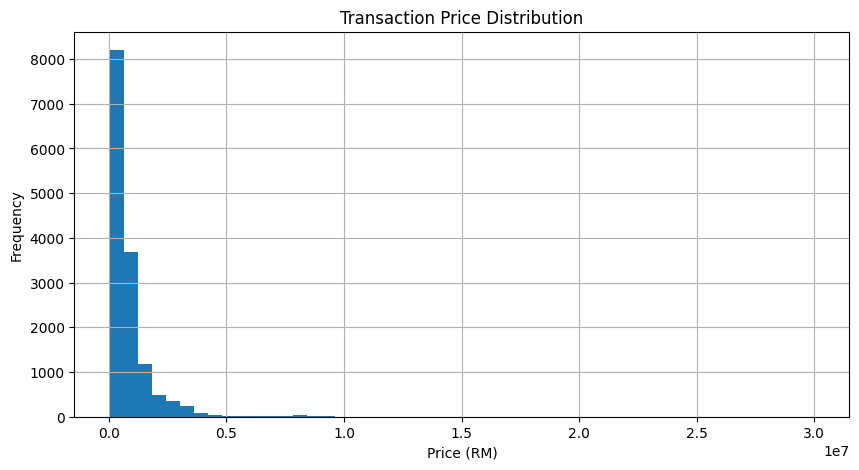

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/englian1123/KL-High-Rise-Data/refs/heads/main/KLHighRise.csv"
df = pd.read_csv(url)

# Clean columns
df.rename(columns={'TransactionPrice  ': 'TransactionPrice'}, inplace=True)
df['Parcel_sq_m'] = df['ParcelArea'].astype(float)  # Corrected column name and removed regex for simplicity
df['Year'] = pd.to_datetime(df['TransactionDate'], format='%b-%y').dt.year

# Additional stats
print("Parcel Area Summary:")
print(df['Parcel_sq_m'].describe())
print("\nUnitLevel Summary:")
print(df['UnitLevel'].describe())
print("\nYearly Counts:")
print(df['Year'].value_counts().sort_index())
print("\nAverage Price by Mukim:")
print(df.groupby('Mukim')['TransactionPrice'].mean().sort_values(ascending=False))
print("\nAverage Price by Tenure:")
print(df.groupby('Tenure')['TransactionPrice'].mean())

# Quick plot: Price distribution
df['TransactionPrice'].hist(bins=50, figsize=(10,5))
plt.title('Transaction Price Distribution')
plt.xlabel('Price (RM)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Assuming df is already loaded from the URL as in your previous run
df['Year'] = pd.to_datetime(df['TransactionDate'], format='%b-%y').dt.year
price_trends = df.groupby('Year')['TransactionPrice'].agg(['mean', 'median', 'min', 'max', 'count', 'std'])
print(price_trends)

               mean    median     min       max  count           std
Year                                                                
2021  800685.863874  550000.0  180000  13953000   1910  8.579329e+05
2022  845839.021105  550000.0   30000   9472000   4454  9.177938e+05
2023  891836.889521  566000.0   30000   9118000   4218  9.238562e+05
2024  944796.325132  560000.0   42000  30000000   3211  1.141469e+06
2025  913031.666667  540000.0   99000   8000000    600  9.692047e+05


             mean       median          std
Year                                       
2021  6363.221190  5534.315214  3384.054968
2022  6051.672172  5172.413793  3239.987110
2023  6180.813553  5330.601093  3093.133850
2024  6376.194803  5242.105263  3756.170186
2025  5952.522338  5041.190416  2840.521088


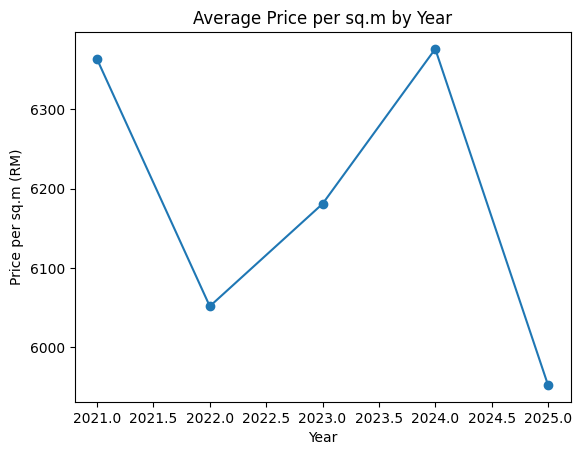

In [ ]:
df['Price_per_sq_m'] = df['TransactionPrice'] / df['Parcel_sq_m']
print(df.groupby('Year')['Price_per_sq_m'].agg(['mean', 'median', 'std']))
df.groupby('Year')['Price_per_sq_m'].mean().plot(kind='line', marker='o')
plt.title('Average Price per sq.m by Year')
plt.xlabel('Year')
plt.ylabel('Price per sq.m (RM)')
plt.show()

# Price per sq.m by Mukim and Year (to see location effects)

In [ ]:
print(df.groupby(['Year', 'Mukim'])['TransactionPrice'].mean().unstack())

Mukim  Kuala Lumpur Town Centre   Mukim Ampang    Mukim Batu  Mukim Cheras  \
Year                                                                         
2021               1.008119e+06  491875.000000  9.513061e+05      724250.0   
2022               1.242748e+06  599421.052632  9.999629e+05      560560.0   
2023               1.246214e+06  567441.860465  1.076863e+06      643200.0   
2024               1.512766e+06  438620.000000  1.166664e+06      506600.0   
2025               1.212922e+06  663600.000000  1.166431e+06      473750.0   

Mukim  Mukim Kuala Lumpur  Mukim Petaling  Mukim Setapak  Mukim Ulu Kelang  
Year                                                                        
2021         1.055003e+06   587771.929825  579047.717842     655357.142857  
2022         1.083057e+06   573915.005247  465076.470588     571000.000000  
2023         1.009262e+06   555052.439024  503603.531300     557944.444444  
2024         8.607708e+05   525030.303030  493880.898876     522000.

# Price per sq.m Distribution by Year

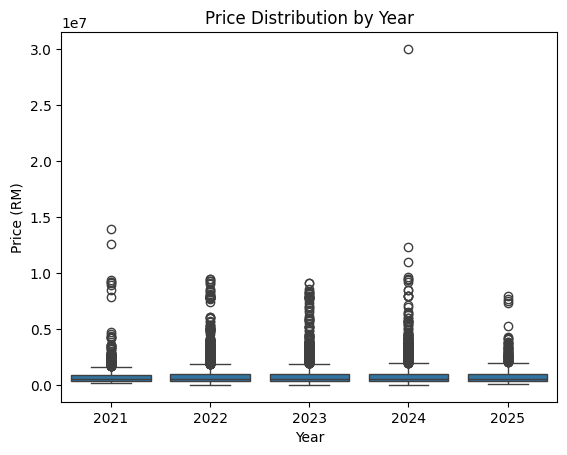

In [ ]:
import seaborn as sns
sns.boxplot(x='Year', y='TransactionPrice', data=df)
plt.title('Price Distribution by Year')
plt.ylabel('Price (RM)')
plt.show()

# Top Schemes by Price per sq.m

In [ ]:
print(df[df['TransactionPrice'] > 10000000][['Year', 'Mukim', 'SchemeName', 'TransactionPrice', 'Parcel_sq_m']])

       Year                     Mukim                             SchemeName  \
1437   2021        Mukim Kuala Lumpur                         AIRA RESIDENCE   
1704   2021        Mukim Kuala Lumpur                  SERAI BUKIT BANDARAYA   
5649   2024  Kuala Lumpur Town Centre  KAW JLN AMPANG/OFF JLN AMPANG/U-THANT   
8570   2024                Mukim Batu                        SENI MONT KIARA   
10431  2024  Kuala Lumpur Town Centre                         MADGE MANSIONS   

       TransactionPrice  Parcel_sq_m  
1437           13953000       443.00  
1704           12625000       627.00  
5649           30000000      1921.52  
8570           12300000       827.00  
10431          11000000       725.00  


# Outlier Details (e.g., 30m RM unit in 2024)

In [ ]:
print(df[df['TransactionPrice'] > 10000000][['Year', 'Mukim', 'SchemeName', 'TransactionPrice', 'Parcel_sq_m', 'Price_per_sq_m']])

       Year                     Mukim                             SchemeName  \
1437   2021        Mukim Kuala Lumpur                         AIRA RESIDENCE   
1704   2021        Mukim Kuala Lumpur                  SERAI BUKIT BANDARAYA   
5649   2024  Kuala Lumpur Town Centre  KAW JLN AMPANG/OFF JLN AMPANG/U-THANT   
8570   2024                Mukim Batu                        SENI MONT KIARA   
10431  2024  Kuala Lumpur Town Centre                         MADGE MANSIONS   

       TransactionPrice  Parcel_sq_m  Price_per_sq_m  
1437           13953000       443.00    31496.613995  
1704           12625000       627.00    20135.566188  
5649           30000000      1921.52    15612.639993  
8570           12300000       827.00    14873.035067  
10431          11000000       725.00    15172.413793  


# Price per sq.m by Mukim and Year (to normalize for unit size)

Mukim  Kuala Lumpur Town Centre  Mukim Ampang   Mukim Batu  Mukim Cheras  \
Year                                                                       
2021                7358.697560   3954.277442  7444.855284   5505.002659   
2022                7418.176436   4226.219015  6698.611089   4359.829632   
2023                7368.081577   4277.114047  6893.080193   4094.861069   
2024                8969.938237   3731.814861  7019.055603   4337.278166   
2025                6764.563620   4431.710087  7081.599824   4287.175637   

Mukim  Mukim Kuala Lumpur  Mukim Petaling  Mukim Setapak  Mukim Ulu Kelang  
Year                                                                        
2021          6799.003718     5266.801634    5681.785191       5718.167993  
2022          6877.695352     5193.895385    4547.972861       5254.638796  
2023          6686.161765     5045.471688    4608.982051       5229.061083  
2024          6000.730335     4899.694456    4485.326611       5017.259549  
2025 

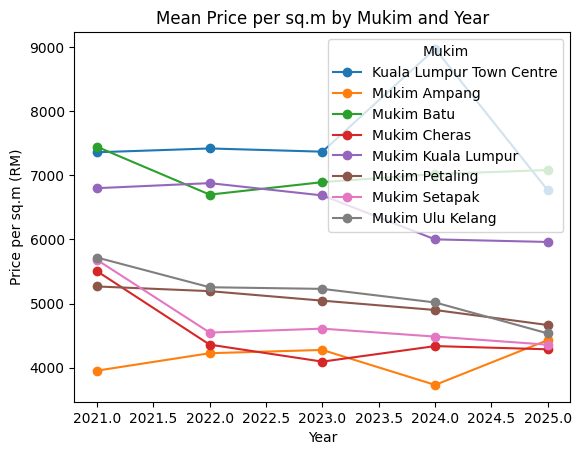

In [ ]:
df['Price_per_sq_m'] = df['TransactionPrice'] / df['Parcel_sq_m']
print(df.groupby(['Year', 'Mukim'])['Price_per_sq_m'].mean().unstack())
df.groupby(['Year', 'Mukim'])['Price_per_sq_m'].mean().unstack().plot(kind='line', marker='o')
plt.title('Mean Price per sq.m by Mukim and Year')
plt.xlabel('Year')
plt.ylabel('Price per sq.m (RM)')
plt.legend(title='Mukim')
plt.show()

# Transaction Counts by Mukim and Year (to weigh price trends by volume)

In [ ]:
print(df.groupby(['Year', 'Mukim'])['TransactionPrice'].count().unstack())

Mukim  Kuala Lumpur Town Centre  Mukim Ampang  Mukim Batu  Mukim Cheras  \
Year                                                                      
2021                        176            16         441             4   
2022                        528            38        1160            25   
2023                        604            43        1154             5   
2024                        590            50         906             5   
2025                        103            10         181             4   

Mukim  Mukim Kuala Lumpur  Mukim Petaling  Mukim Setapak  Mukim Ulu Kelang  
Year                                                                        
2021                  378             399            482                14  
2022                  895             953            850                 5  
2023                  951             820            623                18  
2024                  602             594            445                19  
2025        

# Outlier Details (e.g., 30m RM unit in 2024)

In [ ]:
print(df[df['TransactionPrice'] > 10000000][['Year', 'Mukim', 'SchemeName', 'TransactionPrice', 'Parcel_sq_m', 'Price_per_sq_m']])

       Year                     Mukim                             SchemeName  \
1437   2021        Mukim Kuala Lumpur                         AIRA RESIDENCE   
1704   2021        Mukim Kuala Lumpur                  SERAI BUKIT BANDARAYA   
5649   2024  Kuala Lumpur Town Centre  KAW JLN AMPANG/OFF JLN AMPANG/U-THANT   
8570   2024                Mukim Batu                        SENI MONT KIARA   
10431  2024  Kuala Lumpur Town Centre                         MADGE MANSIONS   

       TransactionPrice  Parcel_sq_m  Price_per_sq_m  
1437           13953000       443.00    31496.613995  
1704           12625000       627.00    20135.566188  
5649           30000000      1921.52    15612.639993  
8570           12300000       827.00    14873.035067  
10431          11000000       725.00    15172.413793  


# Price Trends by Tenure and Mukim:

In [ ]:
print(df.groupby(['Year', 'Mukim', 'Tenure'])['TransactionPrice'].mean().unstack())

Tenure                             Freehold      Leasehold
Year Mukim                                                
2021 Kuala Lumpur Town Centre  1.267574e+06  421944.444444
     Mukim Ampang              6.517143e+05  367555.555556
     Mukim Batu                1.037992e+06  514315.068493
     Mukim Cheras              7.242500e+05            NaN
     Mukim Kuala Lumpur        1.865135e+06  718205.992509
     Mukim Petaling            7.006786e+05  443251.428571
     Mukim Setapak             5.763009e+05  581472.656250
     Mukim Ulu Kelang                   NaN  655357.142857
2022 Kuala Lumpur Town Centre  1.413404e+06  530009.803922
     Mukim Ampang              1.254143e+06  451580.645161
     Mukim Batu                1.112070e+06  489846.889952
     Mukim Cheras              5.488696e+05  695000.000000
     Mukim Kuala Lumpur        1.668506e+06  696378.478664
     Mukim Petaling            6.557079e+05  466512.135922
     Mukim Setapak             4.890244e+05  450028.7356

# **XXXXXX**

In [ ]:
from google.colab import drive
import os

if not os.path.exists('/content/drive'):
  drive.mount('/content/drive')
else:
  print("Drive already mounted")

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/dataset/houseprice.csv')  # load CSV


# First few rows using df.head()
from IPython.display import display, HTML
display(HTML(df.head().to_html()))

# Data types and non-null values
# Convert df.info() output to a DataFrame for better formatting
info_df = pd.DataFrame(df.info())
display(HTML(info_df.to_html()))

# Summary statistics
# Use the style attribute to format the output
styled_description = df.describe().style.format("{:.2f}") # Format to two decimal places
# Display the styled table
styled_description


filtered_df = df[(df['State'] == 'WP Kuala Lumpur') & (df['Sector'] == 'Residential') & (df['Property Type'] == 'Condominium/Apartment')].copy()
# First few rows using df.head()
from IPython.display import display, HTML
display(HTML(filtered_df.head().to_html()))
# Summary statistics
# Use the style attribute to format the output
styled_description = filtered_df.describe().style.format("{:.2f}") # Format to two decimal places
# Display the styled table
styled_description



Drive already mounted


<ipython-input-1-f4578d84b42e>:10: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/dataset/houseprice.csv')  # load CSV


,District,Land Area,Land/Parcel Area,Main Floor Area,Main Floor Area,Mukim,Property Type,Property Type (strata),Road Name,Scheme Name/Area,Sector,State,Tenure,Transaction Date,Transaction Price,Transaction Price,Unit,Unit,Unit 1,Unit Level
0,Johor Bahru,NaN,59.0,NaN,-,Tebrau,Office Lot,Strata,,TMN MOUNT AUSTIN,Commercial,Johor,Freehold,1/9/2022,570000,570000,sq.m,-,NaN,1
1,Johor Bahru,NaN,201.0,NaN,-,Tebrau,Office Lot,Strata,,TMN AUSTIN PERDANA,Commercial,Johor,Freehold,13/3/2023,900000,900000,sq.m,-,NaN,1
2,Johor Bahru,NaN,60.0,NaN,-,Tebrau,Office Lot,Strata,,TMN MOUNT AUSTIN,Commercial,Johor,Freehold,30/12/2022,310000,310000,sq.m,-,NaN,14
3,Johor Bahru,NaN,60.0,NaN,-,Tebrau,Office Lot,Strata,,TMN MOUNT AUSTIN,Commercial,Johor,Freehold,21/12/2022,250000,250000,sq.m,-,NaN,17
4,Johor Bahru,NaN,60.0,NaN,-,Tebrau,Office Lot,Strata,,TMN MOUNT AUSTIN,Commercial,Johor,Freehold,30/8/2022,303120,303000,sq.m,-,NaN,18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464851 entries, 0 to 464850
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   District                464851 non-null  object 
 1   Land Area               335183 non-null  float64
 2   Land/Parcel Area        464851 non-null  float64
 3   Main Floor   Area       335183 non-null  float64
 4   Main Floor Area         464851 non-null  object 
 5   Mukim                   464851 non-null  object 
 6   Property Type           464851 non-null  object 
 7   Property Type (strata)  464851 non-null  object 
 8   Road Name               464851 non-null  object 
 9   Scheme Name/Area        464851 non-null  object 
 10  Sector                  464851 non-null  object 
 11  State                   464851 non-null  object 
 12  Tenure                  464851 non-null  object 
 13  Transaction Date        464851 non-null  object 
 14  Transaction Price   

""


,District,Land Area,Land/Parcel Area,Main Floor Area,Main Floor Area,Mukim,Property Type,Property Type (strata),Road Name,Scheme Name/Area,Sector,State,Tenure,Transaction Date,Transaction Price,Transaction Price,Unit,Unit,Unit 1,Unit Level
50432,Kuala Lumpur,NaN,328.0,NaN,-,Kuala Lumpur Town Centre,Condominium/Apartment,Strata,,AMPERSAND,Residential,WP Kuala Lumpur,Leasehold,22/9/2023,3180000,3180000,sq.m,-,NaN,02
50433,Kuala Lumpur,NaN,75.0,NaN,-,Mukim Setapak,Condominium/Apartment,Strata,,RESIDENSI VISTA SAUJANA,Residential,WP Kuala Lumpur,Leasehold,28/5/2022,300000,300000,sq.m,-,NaN,03A
50434,Kuala Lumpur,NaN,185.0,NaN,-,Kuala Lumpur Town Centre,Condominium/Apartment,Strata,,PANGSA MURNI,Residential,WP Kuala Lumpur,Leasehold,11/10/2021,550000,550000,sq.m,-,NaN,1
50435,Kuala Lumpur,NaN,151.0,NaN,-,Kuala Lumpur Town Centre,Condominium/Apartment,Strata,,CITY GARDEN,Residential,WP Kuala Lumpur,Leasehold,10/1/2022,750000,750000,sq.m,-,NaN,1
50436,Kuala Lumpur,NaN,151.0,NaN,-,Kuala Lumpur Town Centre,Condominium/Apartment,Strata,,CITY GARDEN,Residential,WP Kuala Lumpur,Leasehold,12/1/2022,650000,650000,sq.m,-,NaN,1


,Land Area,Land/Parcel Area,Main Floor Area,Transaction Price,Transaction Price
count,0.00,12735.00,0.00,12735.00,12735.00
mean,nan,127.58,nan,864469.98,864479.15
std,nan,67.41,nan,919499.16,919500.85
min,nan,12.00,nan,30200.00,30000.00
25%,nan,89.00,nan,400000.00,400000.00
50%,nan,109.00,nan,550800.00,551000.00
75%,nan,135.00,nan,1000000.00,1000000.00
max,nan,913.00,nan,13953000.00,13953000.00


In [ ]:
# prompt: filter the dataset to keep only record with state="WP Kuala Lumpur" and  Sector=Residential and Property Type=Condominium/Apartment

filtered_df = df[(df['State'] == 'WP Kuala Lumpur') & (df['Sector'] == 'Residential') & (df['Property Type'] == 'Condominium/Apartment')].copy()

# First few rows using df.head()
display(HTML(filtered_df.head().to_html()))
# Summary statistics
# Use the style attribute to format the output
styled_description = filtered_df.describe().style.format("{:.2f}") # Format to two decimal places
# Display the styled table
styled_description

,District,Land Area,Land/Parcel Area,Main Floor Area,Main Floor Area,Mukim,Property Type,Property Type (strata),Road Name,Scheme Name/Area,Sector,State,Tenure,Transaction Date,Transaction Price,Transaction Price,Unit,Unit,Unit 1,Unit Level
50432,Kuala Lumpur,NaN,328.0,NaN,-,Kuala Lumpur Town Centre,Condominium/Apartment,Strata,,AMPERSAND,Residential,WP Kuala Lumpur,Leasehold,22/9/2023,3180000,3180000,sq.m,-,NaN,02
50433,Kuala Lumpur,NaN,75.0,NaN,-,Mukim Setapak,Condominium/Apartment,Strata,,RESIDENSI VISTA SAUJANA,Residential,WP Kuala Lumpur,Leasehold,28/5/2022,300000,300000,sq.m,-,NaN,03A
50434,Kuala Lumpur,NaN,185.0,NaN,-,Kuala Lumpur Town Centre,Condominium/Apartment,Strata,,PANGSA MURNI,Residential,WP Kuala Lumpur,Leasehold,11/10/2021,550000,550000,sq.m,-,NaN,1
50435,Kuala Lumpur,NaN,151.0,NaN,-,Kuala Lumpur Town Centre,Condominium/Apartment,Strata,,CITY GARDEN,Residential,WP Kuala Lumpur,Leasehold,10/1/2022,750000,750000,sq.m,-,NaN,1
50436,Kuala Lumpur,NaN,151.0,NaN,-,Kuala Lumpur Town Centre,Condominium/Apartment,Strata,,CITY GARDEN,Residential,WP Kuala Lumpur,Leasehold,12/1/2022,650000,650000,sq.m,-,NaN,1


,Land Area,Land/Parcel Area,Main Floor Area,Transaction Price,Transaction Price
count,0.00,12735.00,0.00,12735.00,12735.00
mean,nan,127.58,nan,864469.98,864479.15
std,nan,67.41,nan,919499.16,919500.85
min,nan,12.00,nan,30200.00,30000.00
25%,nan,89.00,nan,400000.00,400000.00
50%,nan,109.00,nan,550800.00,551000.00
75%,nan,135.00,nan,1000000.00,1000000.00
max,nan,913.00,nan,13953000.00,13953000.00


Median Transaction Price: 550800.00
Skewness of Transaction Price: 4.47


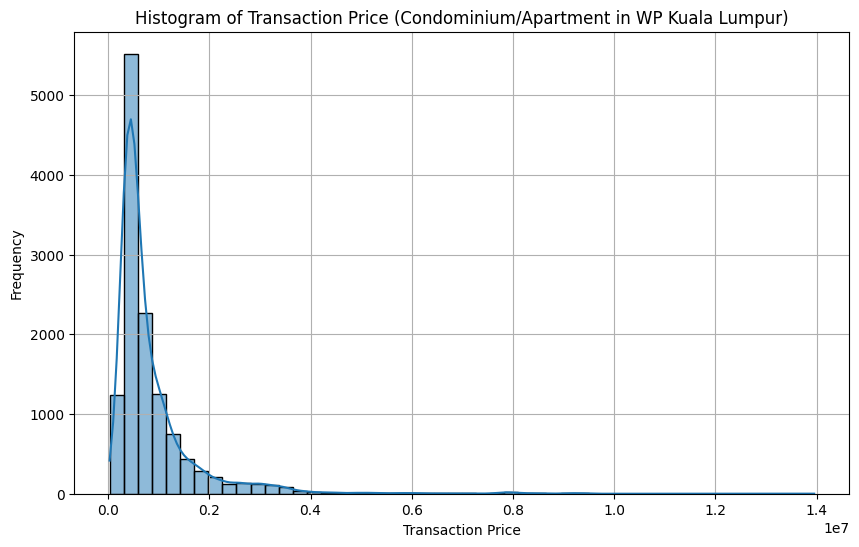

In [ ]:
# prompt: get median for transaction price and skewness, plot the histogram

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the median of 'Transaction Price'
median_price = filtered_df['Transaction Price'].median()
print(f"Median Transaction Price: {median_price:.2f}")

# Calculate the skewness of 'Transaction Price'
skewness_price = filtered_df['Transaction Price'].skew()
print(f"Skewness of Transaction Price: {skewness_price:.2f}")

# Plot the histogram of 'Transaction Price'
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['Transaction Price'], bins=50, kde=True)
plt.title('Histogram of Transaction Price (Condominium/Apartment in WP Kuala Lumpur)')
plt.xlabel('Transaction Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

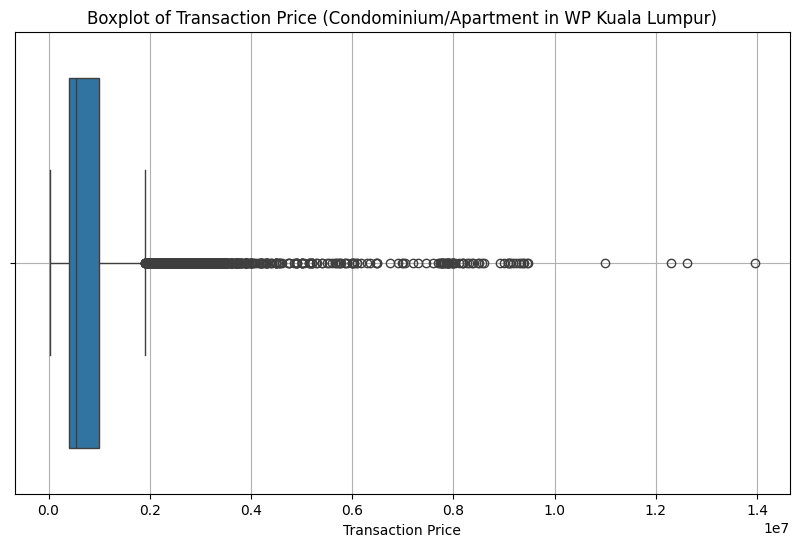

In [ ]:
# prompt: plot boxplot

# Plot a boxplot of 'Transaction Price'
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_df['Transaction Price'])
plt.title('Boxplot of Transaction Price (Condominium/Apartment in WP Kuala Lumpur)')
plt.xlabel('Transaction Price')
plt.grid(True)
plt.show()

Median Land/Parcel Area: 109.00
Skewness of Land/Parcel Area: 2.93


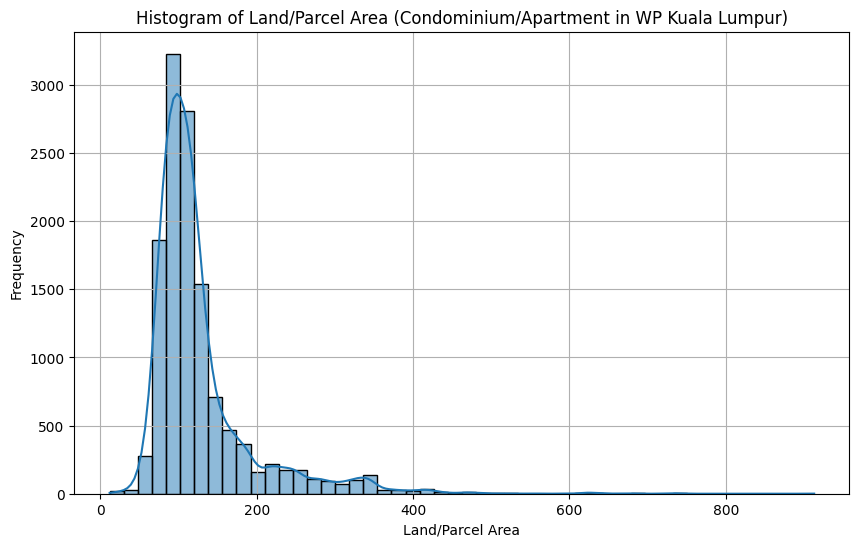

In [ ]:
# prompt: get median for transaction price and skewness, plot the histogram

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the median of 'Transaction Price'
median_price = filtered_df['Land/Parcel Area'].median()
print(f"Median Land/Parcel Area: {median_price:.2f}")

# Calculate the skewness of 'Transaction Price'
skewness_price = filtered_df['Land/Parcel Area'].skew()
print(f"Skewness of Land/Parcel Area: {skewness_price:.2f}")

# Plot the histogram of 'Land/Parcel Areae'
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['Land/Parcel Area'], bins=50, kde=True)
plt.title('Histogram of Land/Parcel Area (Condominium/Apartment in WP Kuala Lumpur)')
plt.xlabel('Land/Parcel Area')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

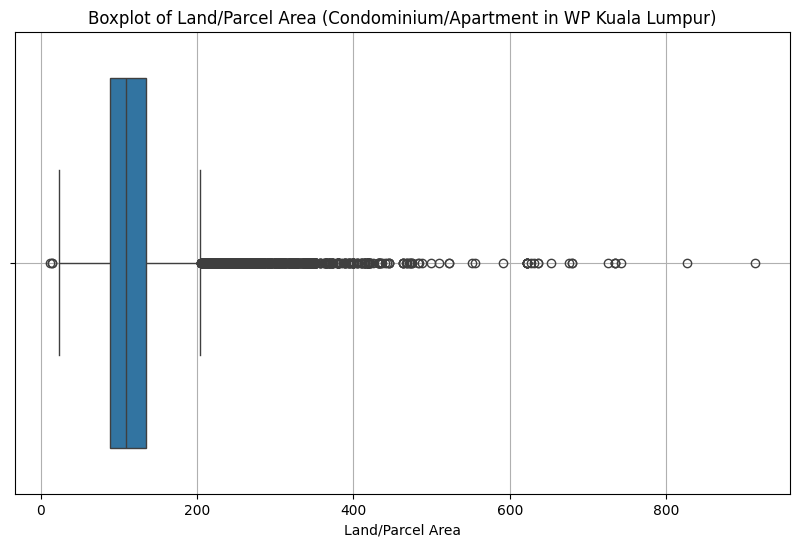

In [ ]:
# prompt: plot boxplot

# Plot a boxplot of 'Land/Parcel Area'
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_df['Land/Parcel Area'])
plt.title('Boxplot of Land/Parcel Area (Condominium/Apartment in WP Kuala Lumpur)')
plt.xlabel('Land/Parcel Area')
plt.grid(True)
plt.show()

<ipython-input-10-00af997c519d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, y=col, order=filtered_df[col].value_counts().index, palette='viridis')


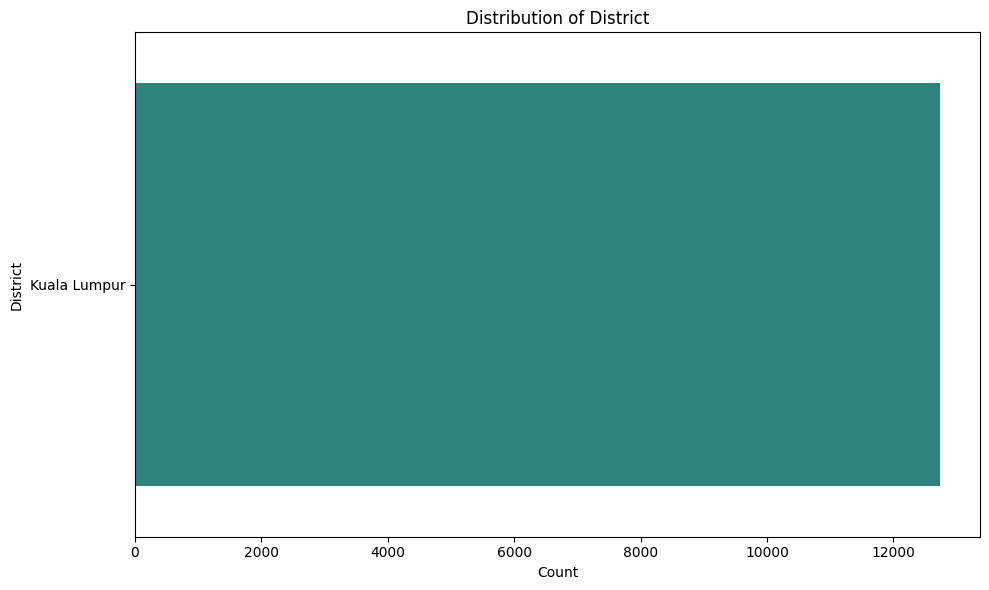

<ipython-input-10-00af997c519d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, y=col, order=filtered_df[col].value_counts().index, palette='viridis')


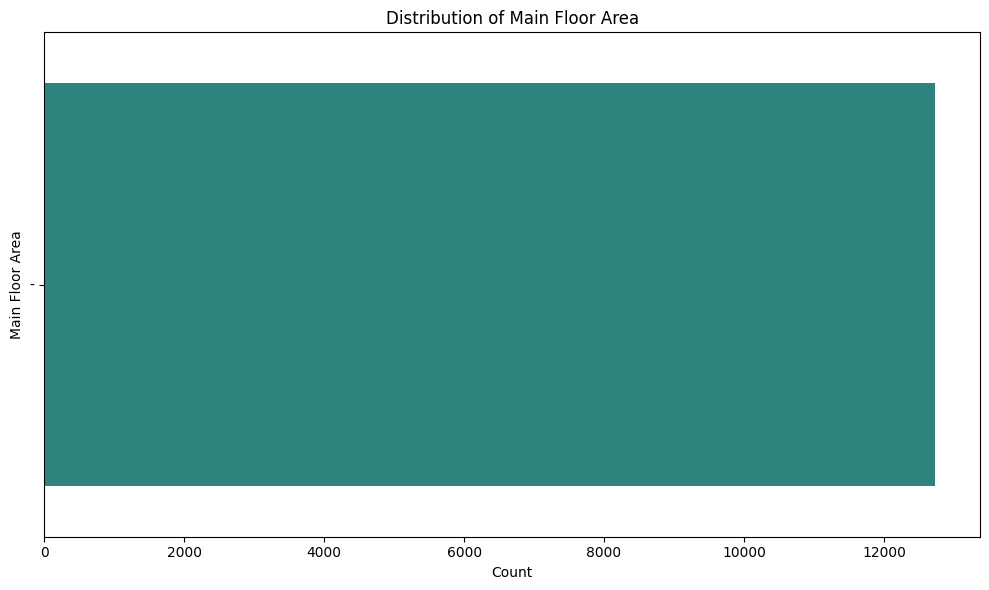

<ipython-input-10-00af997c519d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, y=col, order=filtered_df[col].value_counts().index, palette='viridis')


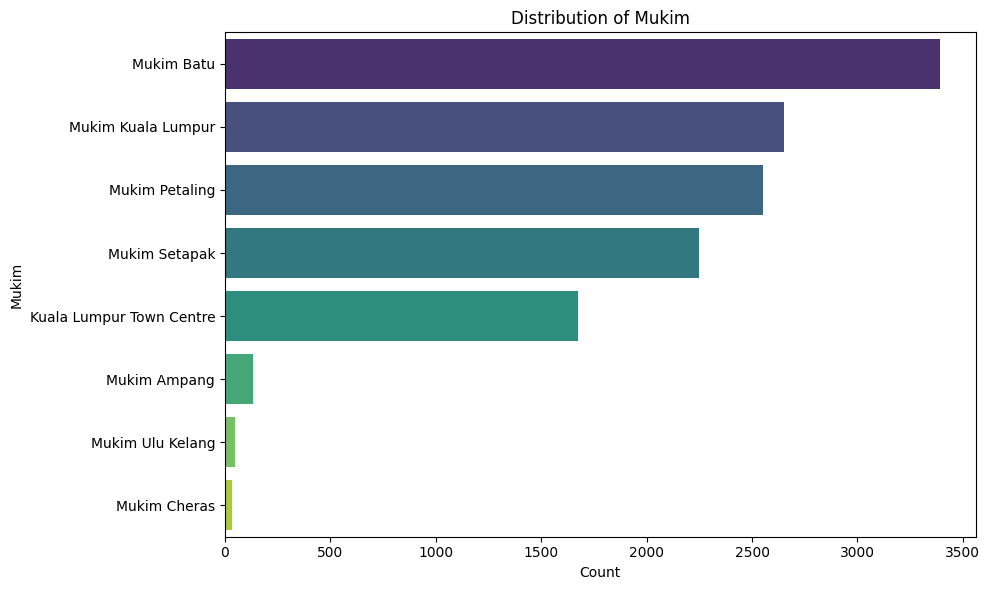

<ipython-input-10-00af997c519d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, y=col, order=filtered_df[col].value_counts().index, palette='viridis')


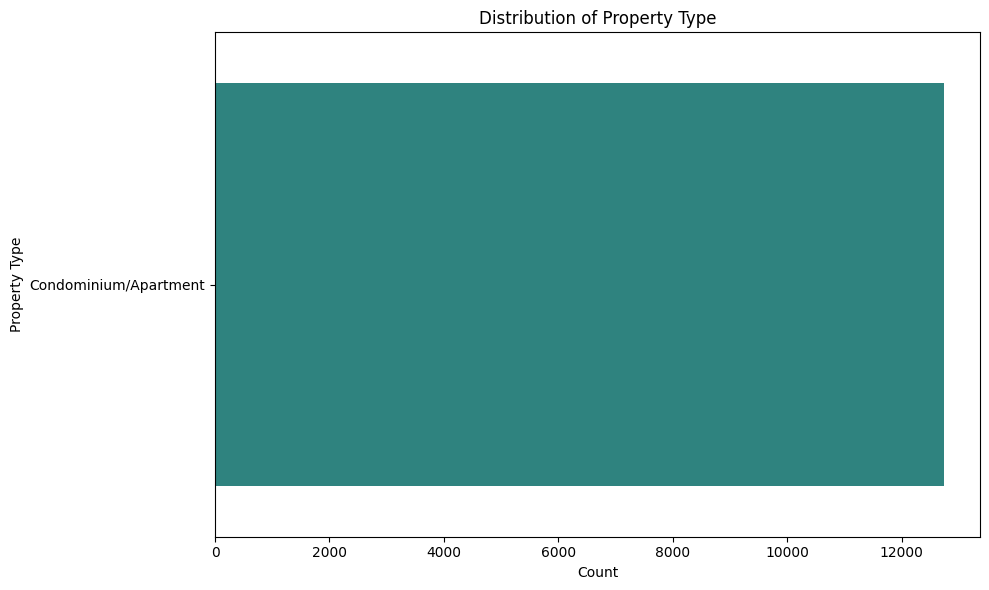

<ipython-input-10-00af997c519d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, y=col, order=filtered_df[col].value_counts().index, palette='viridis')


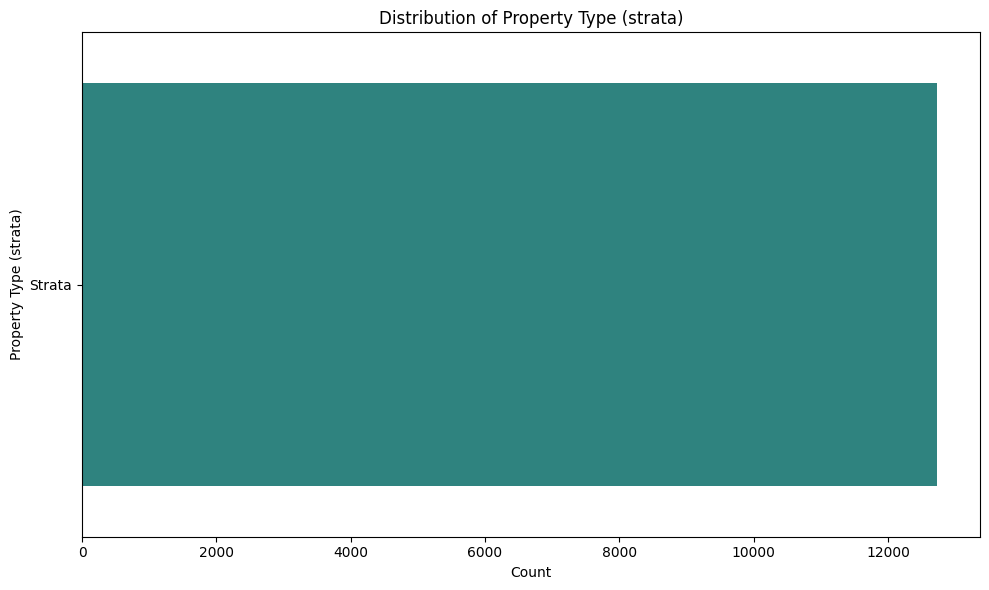

<ipython-input-10-00af997c519d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, y=col, order=filtered_df[col].value_counts().index, palette='viridis')


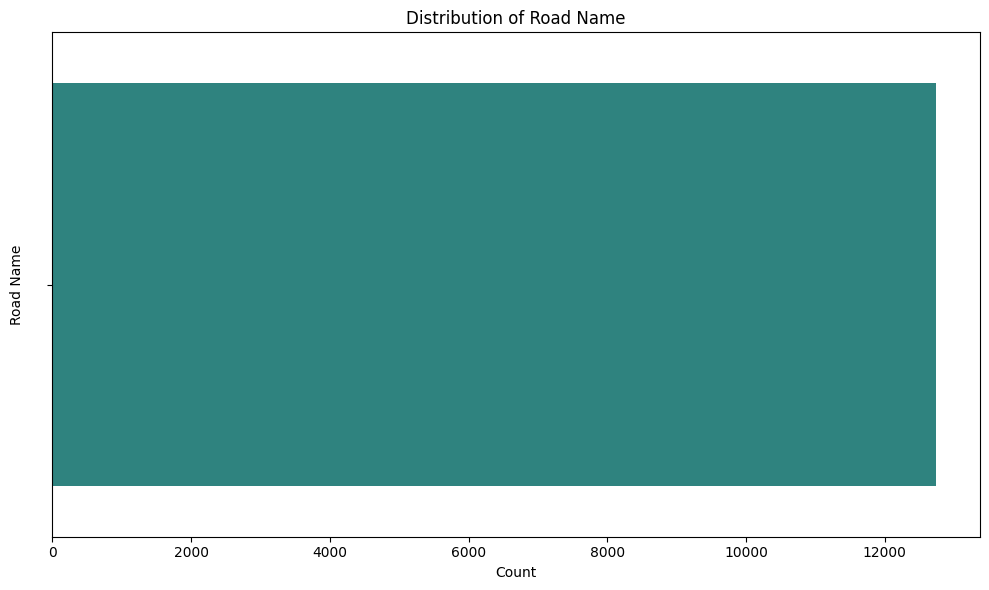

<ipython-input-10-00af997c519d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, y=col, order=filtered_df[col].value_counts().index, palette='viridis')


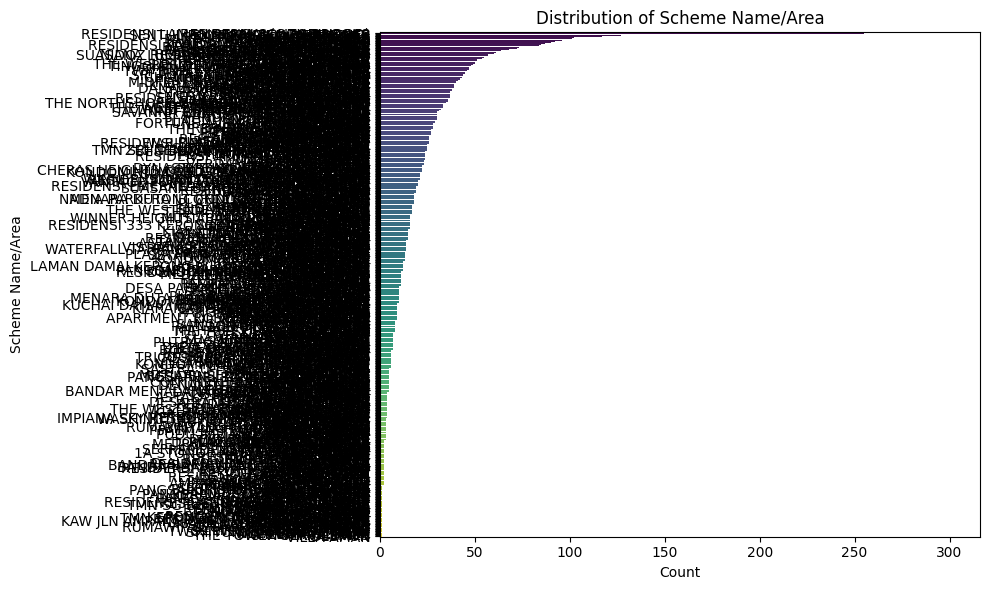

<ipython-input-10-00af997c519d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, y=col, order=filtered_df[col].value_counts().index, palette='viridis')


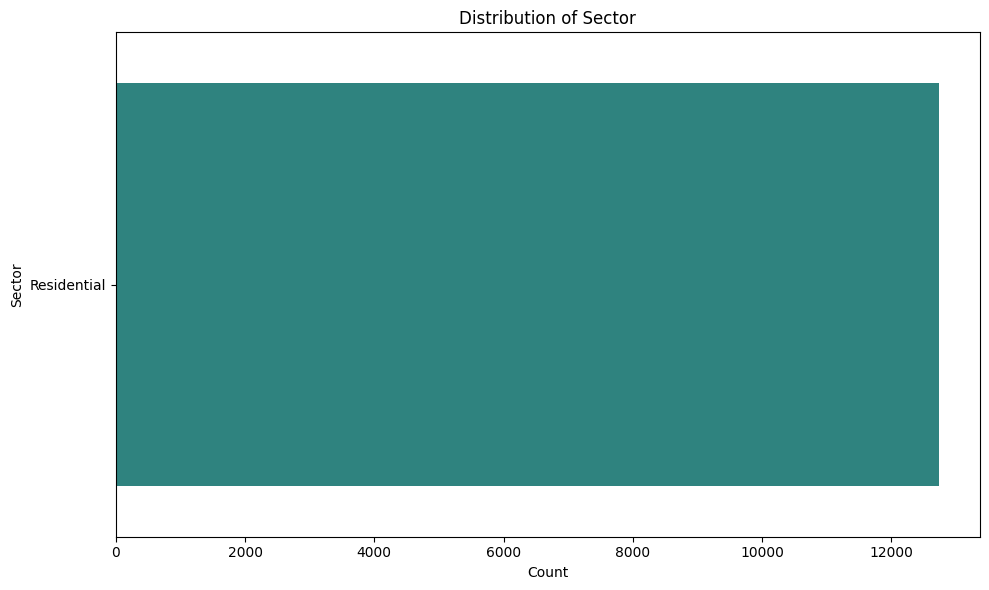

<ipython-input-10-00af997c519d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, y=col, order=filtered_df[col].value_counts().index, palette='viridis')


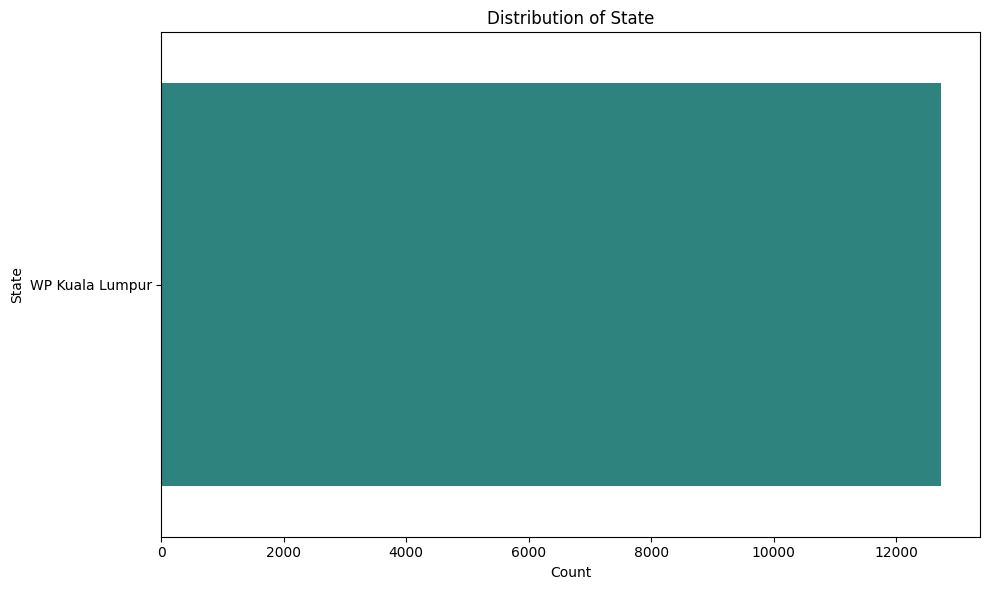

<ipython-input-10-00af997c519d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, y=col, order=filtered_df[col].value_counts().index, palette='viridis')


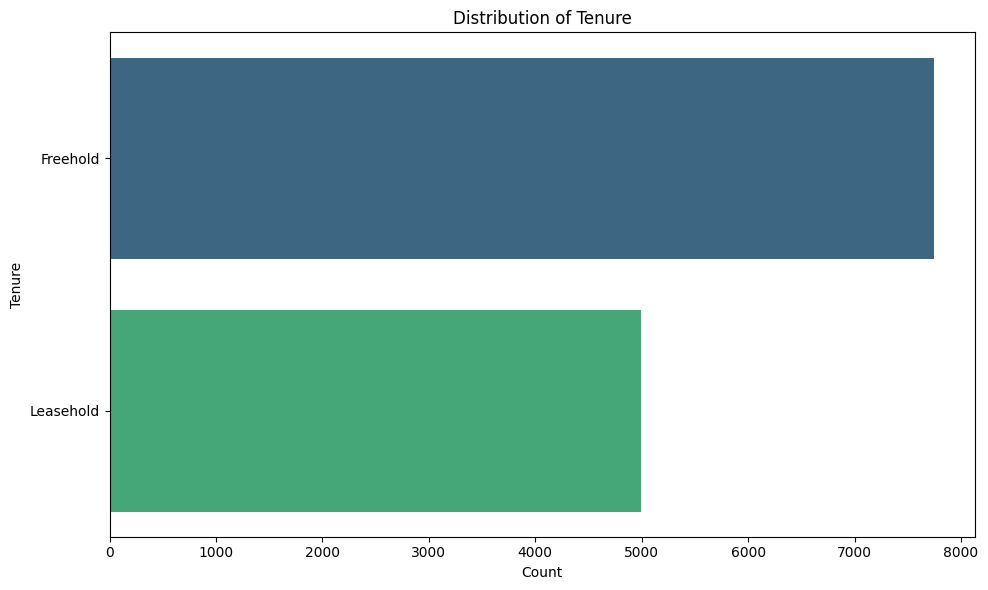

<ipython-input-10-00af997c519d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, y=col, order=filtered_df[col].value_counts().index, palette='viridis')


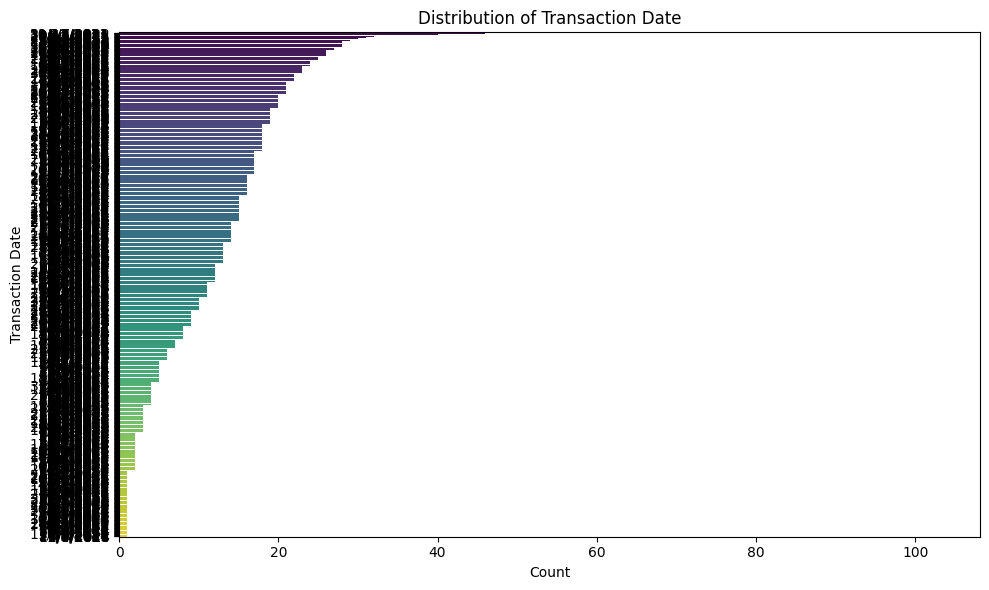

<ipython-input-10-00af997c519d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, y=col, order=filtered_df[col].value_counts().index, palette='viridis')


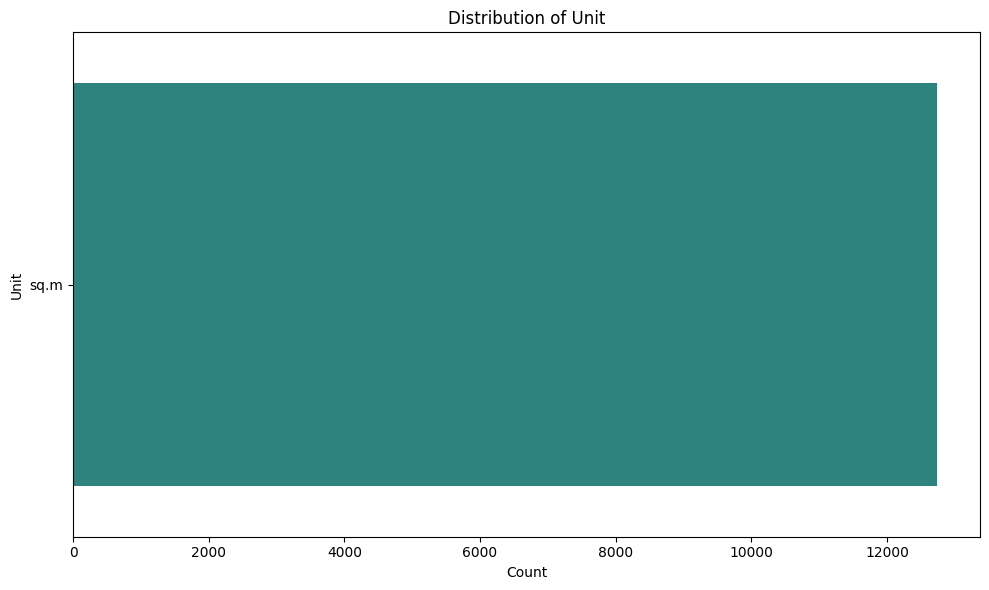

<ipython-input-10-00af997c519d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, y=col, order=filtered_df[col].value_counts().index, palette='viridis')


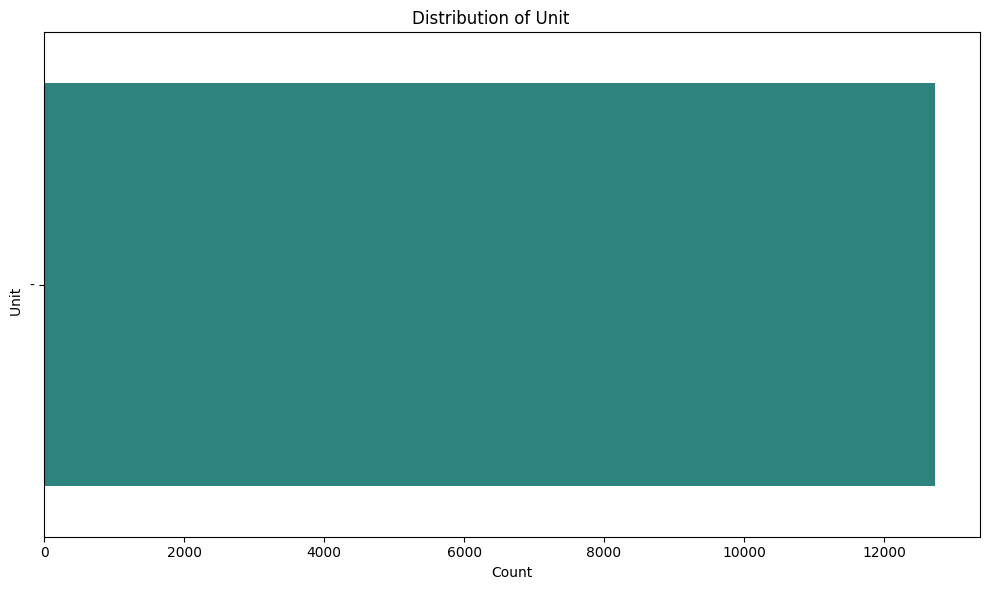

<ipython-input-10-00af997c519d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, y=col, order=filtered_df[col].value_counts().index, palette='viridis')
<ipython-input-10-00af997c519d>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.countplot(data=filtered_df, y=col, order=filtered_df[col].value_counts().index, palette='viridis')


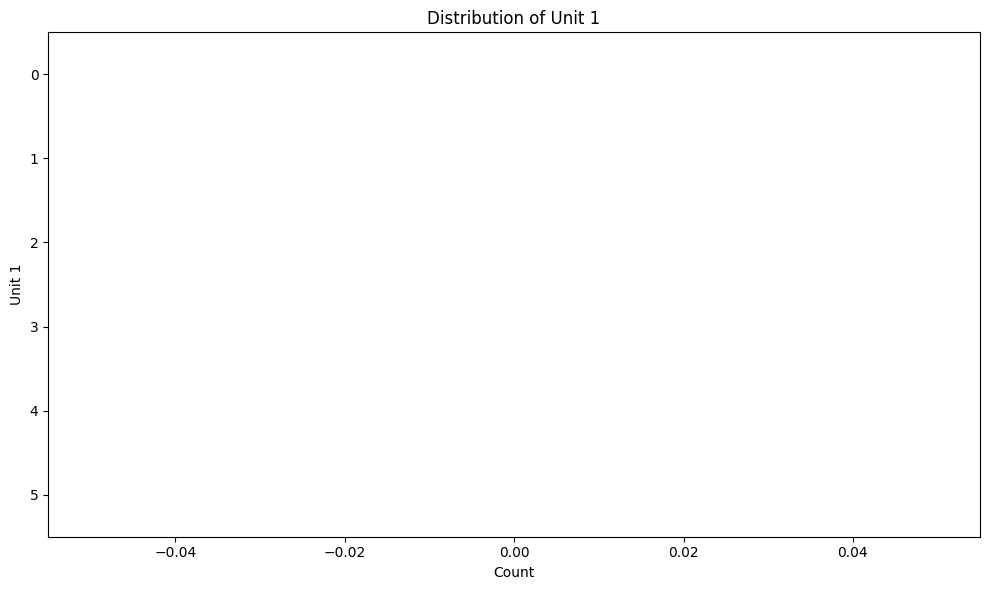

<ipython-input-10-00af997c519d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, y=col, order=filtered_df[col].value_counts().index, palette='viridis')


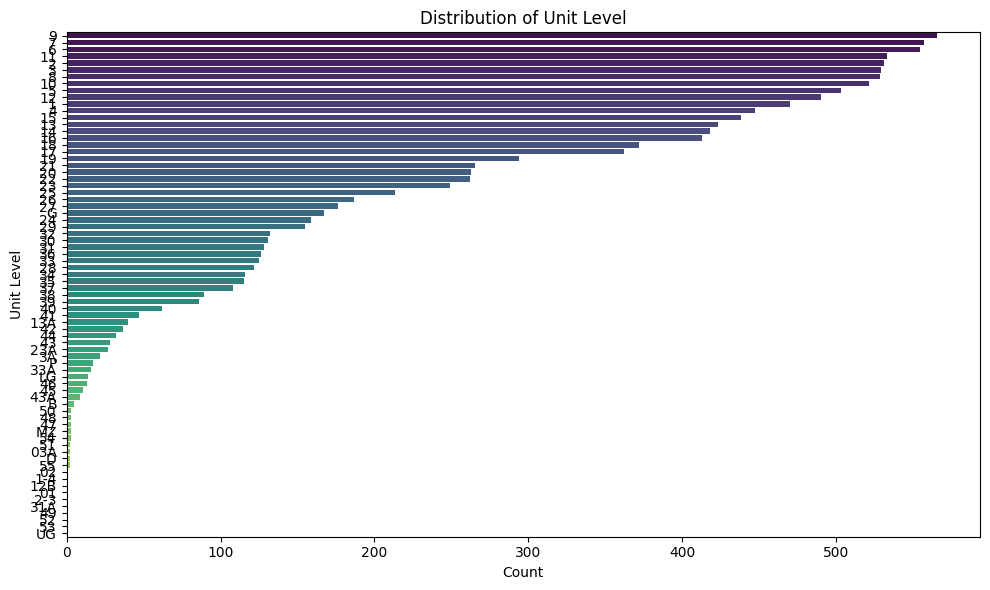

In [ ]:
# prompt: plot histogram for all categorical variables

# Select categorical columns
categorical_cols = filtered_df.select_dtypes(include='object').columns

# Plot histograms for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=filtered_df, y=col, order=filtered_df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

<ipython-input-12-378edb3a176c>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_unit_level.values, y=top_10_unit_level.index, palette='viridis')


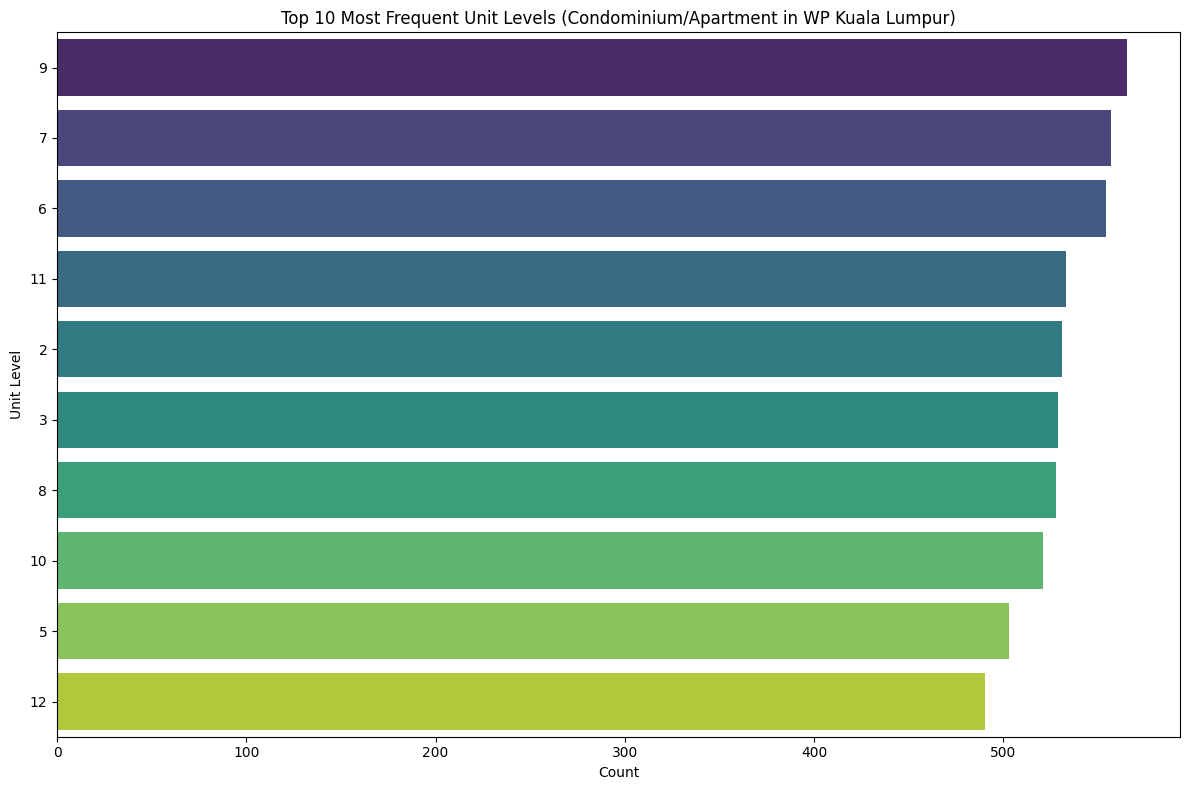

<ipython-input-12-378edb3a176c>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_schema_area.values, y=top_10_schema_area.index, palette='magma')


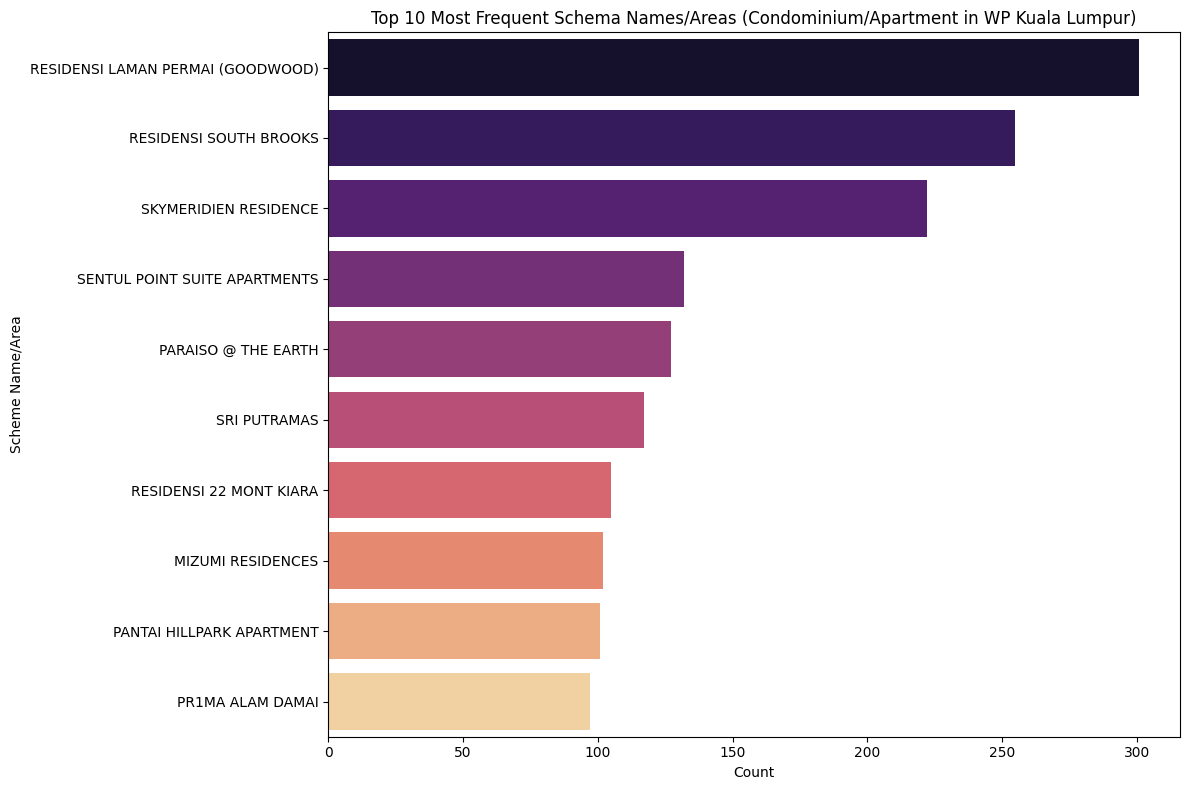

In [ ]:
# prompt: provide implication for distribution of mukim vs transaction price and tenure vs transaction price

# Implications of 'Mukim' vs 'Transaction Price'
print("\nImplications for Distribution of 'Mukim' vs 'Transaction Price':")
print("""
The analysis of 'Mukim' vs 'Transaction Price' (which would be visualized by a boxplot or violin plot of Transaction Price grouped by Mukim, although not explicitly plotted in the provided code) can reveal the geographical price variations within WP Kuala Lumpur for Condominium/Apartments.
Different Mukims represent different areas with varying levels of infrastructure, amenities, demand, and socio-economic factors.

Implications:
1.  **Identification of High/Low Value Areas:** Certain Mukims will likely have significantly higher median or average transaction prices than others. This indicates premium locations, possibly due to proximity to the city center, good transport links, prestigious neighborhoods, or better facilities. Conversely, some Mukims may show lower prices, suggesting less developed areas, distance from key amenities, or different market dynamics.
2.  **Market Segmentation:** The distribution highlights how the condominium market is segmented geographically. Developers and investors can use this information to target specific Mukims based on price points and target demographics.
3.  **Factors Influencing Price:** Differences in price distributions across Mukims can be influenced by various factors:
    *   **Location:** Proximity to business districts, shopping malls, educational institutions, and entertainment hubs.
    *   **Infrastructure:** Quality of roads, public transport (MRT, LRT), utilities.
    *   **Development Level:** Presence of new developments, urban regeneration projects.
    *   **Neighborhood Characteristics:** Safety, cleanliness, green spaces, community facilities.
    *   **Supply and Demand:** Higher demand in certain Mukims can drive up prices.
4.  **Risk Assessment:** Understanding the price volatility (indicated by the spread/IQR in a boxplot) within each Mukim can help assess investment risk. Mukims with wider spreads might have more diverse property types or fluctuating market conditions.
5.  **Future Planning:** For urban planners and local authorities, this distribution helps understand which areas are experiencing significant growth or stagnation in property values, informing decisions about infrastructure development and zoning.

In summary, examining the distribution of Transaction Price across different Mukims provides crucial insights into the spatial variation of property values, helping to understand the market dynamics driven by geographical factors.
""")

# Implications of 'Tenure' vs 'Transaction Price'
# Note: 'Tenure' is a categorical variable often representing Leasehold or Freehold
# A boxplot or violin plot would typically be used to visualize this relationship.
print("\nImplications for Distribution of 'Tenure' vs 'Transaction Price':")
print("""
The analysis of 'Tenure' vs 'Transaction Price' (again, assuming a visualization like a boxplot comparing prices for different tenure types) reveals how the ownership status of a property impacts its market value for Condominium/Apartments in WP Kuala Lumpur. Property tenure typically refers to Freehold or Leasehold.

Implications:
1.  **Price Premium for Freehold:** Generally, Freehold properties tend to command a higher price than Leasehold properties, assuming other factors (location, size, condition) are comparable. This is because Freehold ownership is perpetual, offering full ownership rights to the land indefinitely.
2.  **Perceived Value and Security:** Buyers often perceive Freehold properties as more valuable and secure long-term investments due to the absence of a lease expiry date. This willingness to pay a premium for security and indefinite ownership is reflected in the transaction prices.
3.  **Investment Horizon:** Leasehold properties, while potentially cheaper initially, have a finite lease period (commonly 99 years in Malaysia). As the lease term shortens, the property's value may depreciate, and there are potential costs and complexities associated with extending the lease or converting it to Freehold (if possible). This affects their attractiveness as a long-term investment compared to Freehold.
4.  **Financing:** Financing options and terms might sometimes differ slightly between Freehold and Leasehold properties, which can indirectly influence transaction prices and marketability. Properties with very short remaining lease terms can be difficult to finance.
5.  **Market Supply and Demand:** The proportion of Freehold versus Leasehold Condominium/Apartments available in WP Kuala Lumpur also plays a role. In certain areas, there might be a higher supply of one type, influencing the competitive landscape and pricing.

    In summary, the distribution of Transaction Price based on 'Tenure' demonstrates the market's valuation of different ownership types, with Freehold typically being associated with higher prices due to perpetual ownership and perceived long-term value.
""")


In [ ]:
# prompt: can u write implication for the bar char plotted above

print("""
Based on the bar charts plotted above for the filtered dataset (Condominium/Apartment in WP Kuala Lumpur):

1.  **Top 10 Most Frequent Unit Levels:** This chart shows which floor levels within condominium/apartment buildings in WP Kuala Lumpur have the most recorded transactions. It reveals that certain floor ranges are significantly more common in the dataset. This could indicate:
    *   A higher supply of units on these levels.
    *   Popularity of units on these levels due to factors like view, accessibility, or pricing.
    *   Potential for rental yield analysis based on floor level popularity.

  2.  **Top 10 Most Frequent Scheme Names/Areas:** This chart identifies the specific condominium/apartment schemes or areas within WP Kuala Lumpur that have the highest number of transactions in the dataset. This is a crucial insight as it highlights:
      *   The most active and potentially popular developments or neighborhoods for this property type.
      *   Areas where market activity is concentrated.
      *   Potential for further analysis into the characteristics (e.g., amenities, age, developer) of these high-activity schemes/areas.

Together, these charts provide a valuable snapshot of the supply and demand dynamics within the WP Kuala Lumpur condominium/apartment market, indicating which levels and locations are experiencing the most activity. This information is useful for market analysis, identifying popular locations, and potentially for property valuation.
""")

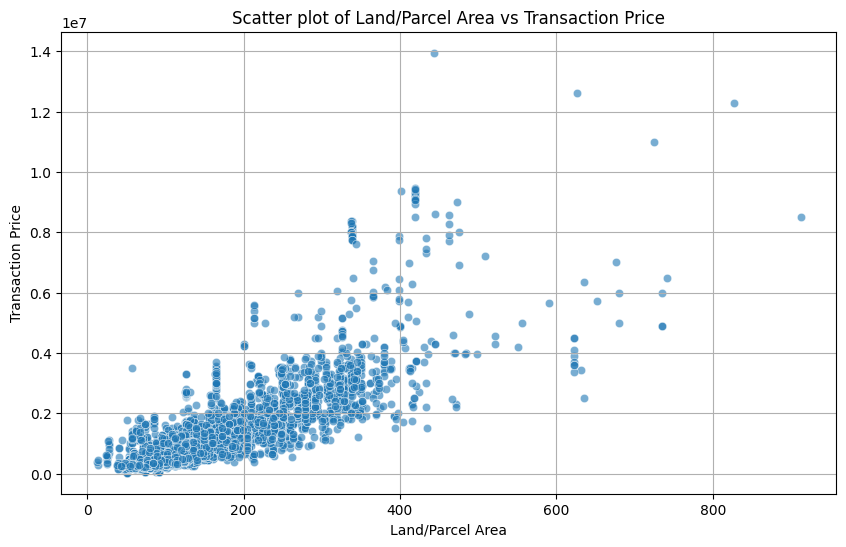

In [ ]:
# prompt: scatterplot for land/parcel area vs transaction price

# Scatter plot of Land/Parcel Area vs Transaction Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='Land/Parcel Area', y='Transaction Price', alpha=0.6)
plt.title('Scatter plot of Land/Parcel Area vs Transaction Price')
plt.xlabel('Land/Parcel Area')
plt.ylabel('Transaction Price')
plt.grid(True)
plt.show()

In [ ]:
# prompt: what is implication from the plot

Based on the scatter plot of 'Land/Parcel Area' versus 'Transaction Price' for Condominium/Apartment properties in WP Kuala Lumpur:

The plot suggests a general trend where 'Transaction Price' tends to increase as 'Land/Parcel Area' increases. This indicates a positive  . However, the scatter is likely spread out, indicating that while size is a factor, other variables also significantly influence the transaction price of condominiums and apartments in this area. There might be clusters or outliers that deviate from the main trend, potentially due to factors not captured in this plot such as location within WP Kuala Lumpur, property age, amenities, or market conditions.

<ipython-input-14-f5dd0bd29038>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x=col, y='Transaction Price', order=filtered_df.groupby(col)['Transaction Price'].median().sort_values().index, palette='viridis')


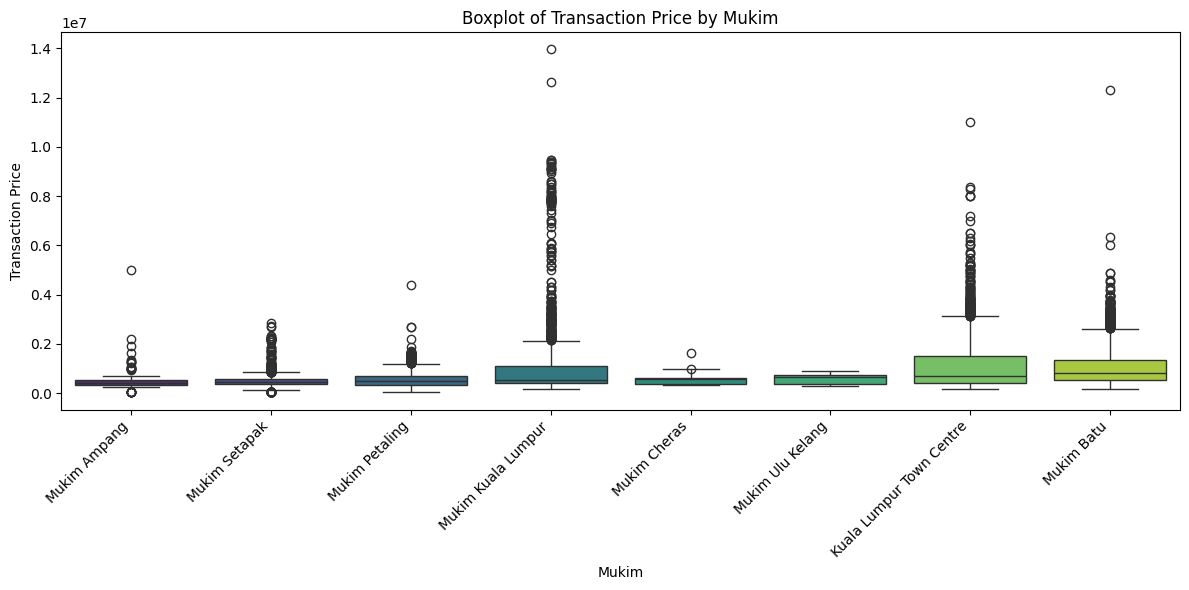

<ipython-input-14-f5dd0bd29038>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x=col, y='Transaction Price', order=filtered_df.groupby(col)['Transaction Price'].median().sort_values().index, palette='viridis')


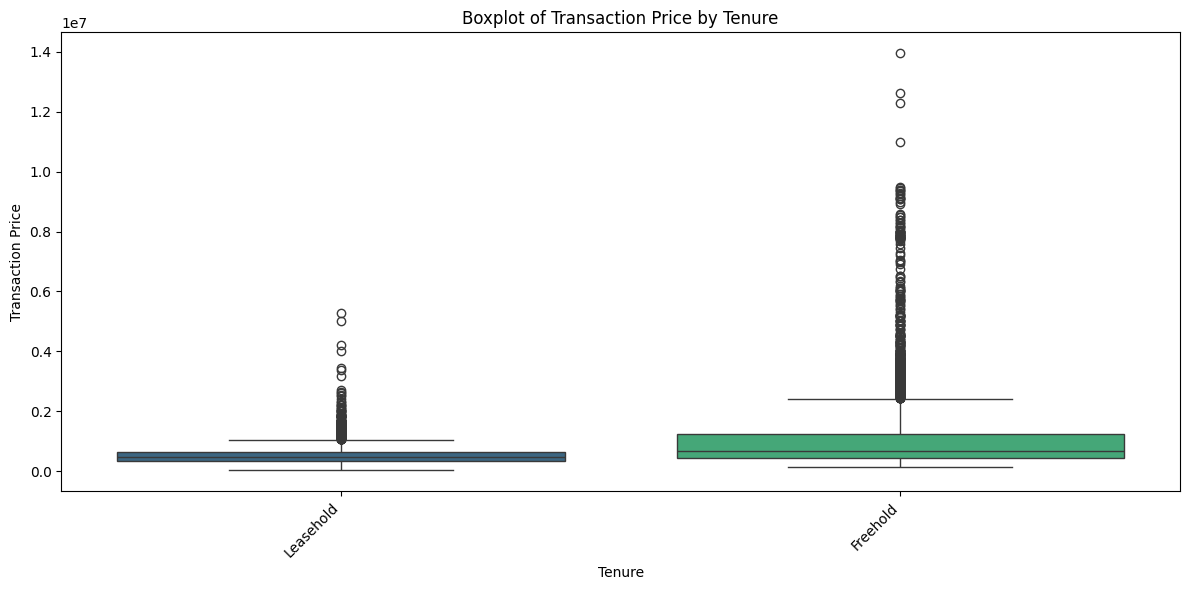

Column 'Property Category' not found or is not categorical in the dataframe.


<ipython-input-14-f5dd0bd29038>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x=col, y='Transaction Price', order=filtered_df.groupby(col)['Transaction Price'].median().sort_values().index, palette='viridis')


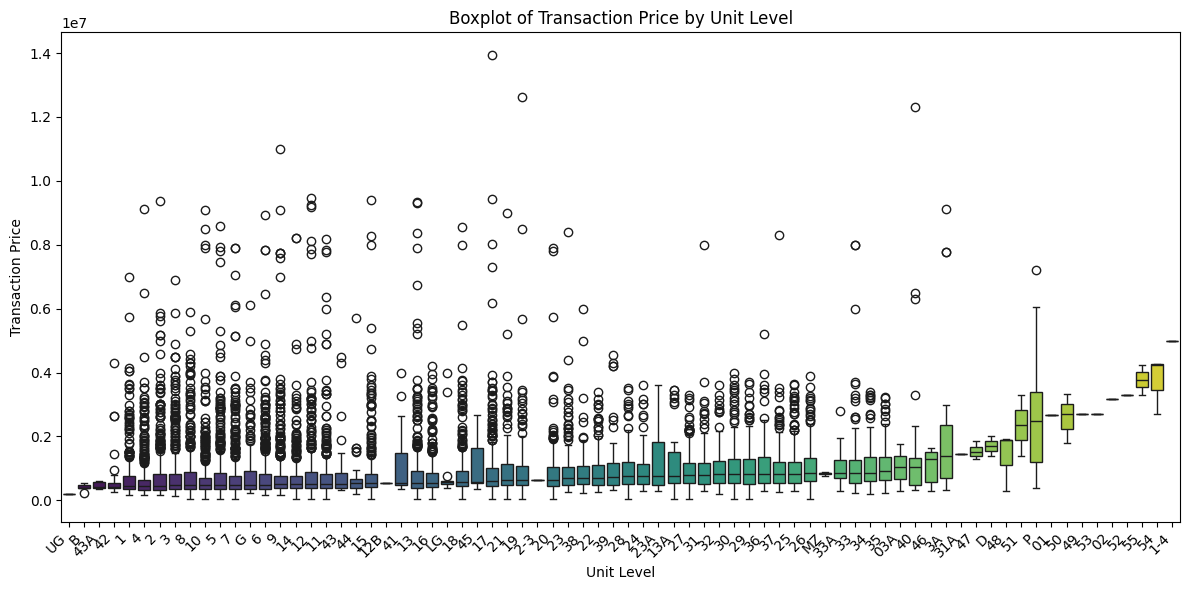

<ipython-input-14-f5dd0bd29038>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x=col, y='Transaction Price', order=filtered_df.groupby(col)['Transaction Price'].median().sort_values().index, palette='viridis')


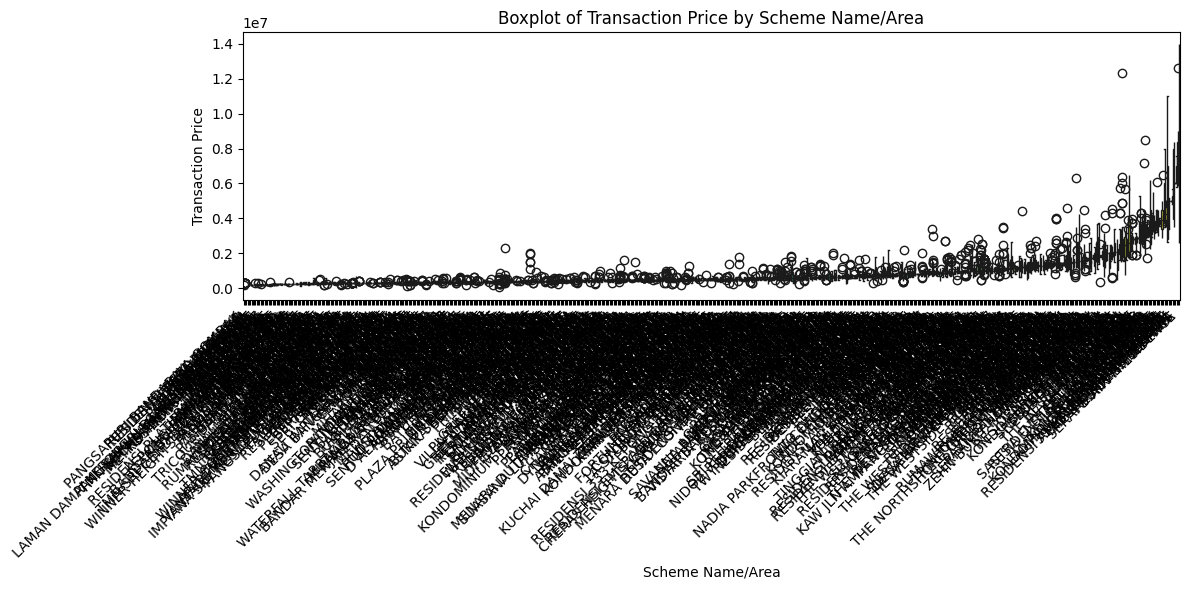

In [ ]:
# prompt: plot boxplot for categorical variables vs transaction price

# List of categorical columns you want to plot against 'Transaction Price'
categorical_vars_to_plot = ['Mukim', 'Tenure', 'Property Category', 'Unit Level', 'Scheme Name/Area'] # Add or remove columns as needed

# Plot boxplots for each specified categorical variable vs Transaction Price
for col in categorical_vars_to_plot:
    if col in filtered_df.columns and filtered_df[col].dtype == 'object': # Check if the column exists and is categorical
        plt.figure(figsize=(12, 6))
        # Use ordered categories based on the median Transaction Price for better visualization
        sns.boxplot(data=filtered_df, x=col, y='Transaction Price', order=filtered_df.groupby(col)['Transaction Price'].median().sort_values().index, palette='viridis')
        plt.title(f'Boxplot of Transaction Price by {col}')
        plt.xlabel(col)
        plt.ylabel('Transaction Price')
        plt.xticks(rotation=45, ha='right') # Rotate labels if they overlap
        plt.tight_layout()
        plt.show()
    else:
        print(f"Column '{col}' not found or is not categorical in the dataframe.")

In [ ]:
# prompt: implication or insights from tenure vs transaction price and mukim vs transaction price

# Implications or Insights from Tenure vs Transaction Price and Mukim vs Transaction Price
print("\nImplications or Insights from Tenure vs Transaction Price:")
print("""
Analyzing the relationship between 'Tenure' and 'Transaction Price' for Condominium/Apartment properties in WP Kuala Lumpur typically shows that **Freehold properties command a premium compared to Leasehold properties**. The key insights are:
1.  **Higher Value for Freehold:** Properties with Freehold tenure are generally transacted at higher prices than comparable Leasehold properties. This reflects the market's valuation of perpetual ownership versus ownership for a limited time.
2.  **Security and Long-Term Investment:** Buyers are often willing to pay more for Freehold properties due to the perceived security and lack of concerns about lease expiry and potential costs/complexities associated with lease renewal. This makes Freehold more attractive for long-term investment horizons.
3.  **Financing Considerations:** While not always a direct price driver, the ease of financing, especially for properties with short remaining lease terms, can indirectly impact marketability and thus transaction price.

The boxplot of 'Tenure' vs 'Transaction Price' (generated above) visually confirms this by showing a higher median and upper quartile for Freehold prices compared to Leasehold prices.

""")

print("\nImplications or Insights from Mukim vs Transaction Price:")
print("""
Examining the relationship between 'Mukim' and 'Transaction Price' provides crucial insights into the **geographical variation of property values** within WP Kuala Lumpur for Condominium/Apartment properties. The key insights from the boxplot of 'Mukim' vs 'Transaction Price' (generated above) are:
1.  **Spatial Price Discrepancies:** There are significant differences in the median and distribution of transaction prices across different Mukims. This highlights that location within WP Kuala Lumpur is a major determinant of property value.
2.  **Identification of Premium and Affordable Areas:** Some Mukims consistently show higher median prices and potentially tighter price ranges (indicating established high-value areas), while others exhibit lower median prices and potentially wider ranges (suggesting more diverse property types or development stages).
3.  **Influence of Local Factors:** The price variations across Mukims are driven by a multitude of local factors such as proximity to the Central Business District, quality of infrastructure (transport links, roads), availability of amenities (shopping malls, schools, parks), neighborhood reputation, safety, and ongoing development projects.
4.  **Market Targeting:** This analysis helps identify which Mukims represent different market segments based on price points, valuable for developers, investors, and real estate agents in targeting specific buyer profiles.
5.  **Urban Planning Insights:**

The boxplot of 'Mukim' vs 'Transaction Price' effectively visualizes these differences, showing the spread and central tendency of prices within each specific geographical area (Mukim).
""")


<ipython-input-6-b46946e9527b>:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_average_price = filtered_df.set_index('Transaction Date').resample('M')['Transaction Price'].mean()
<ipython-input-6-b46946e9527b>:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_median_price = filtered_df.set_index('Transaction Date').resample('M')['Transaction Price'].median()


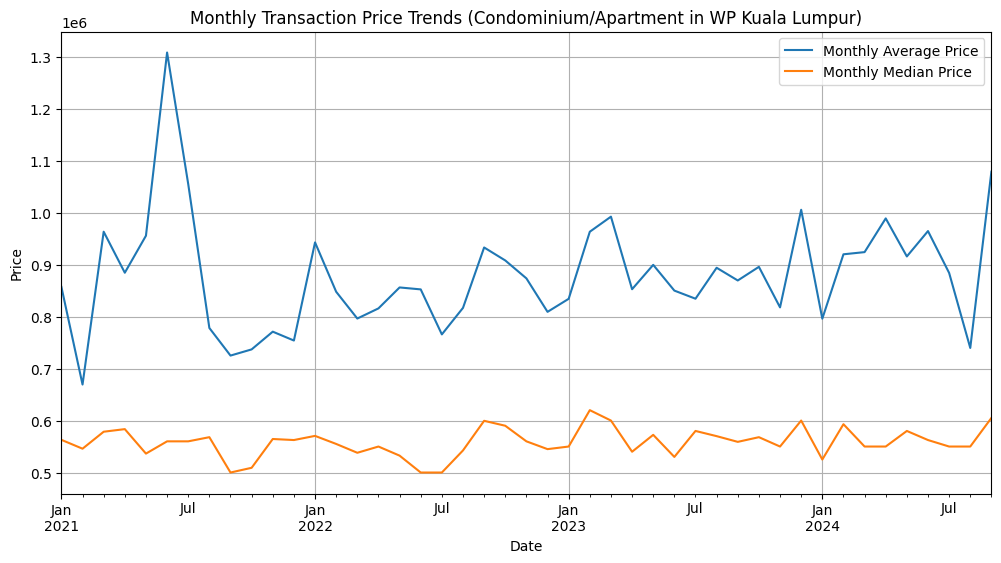

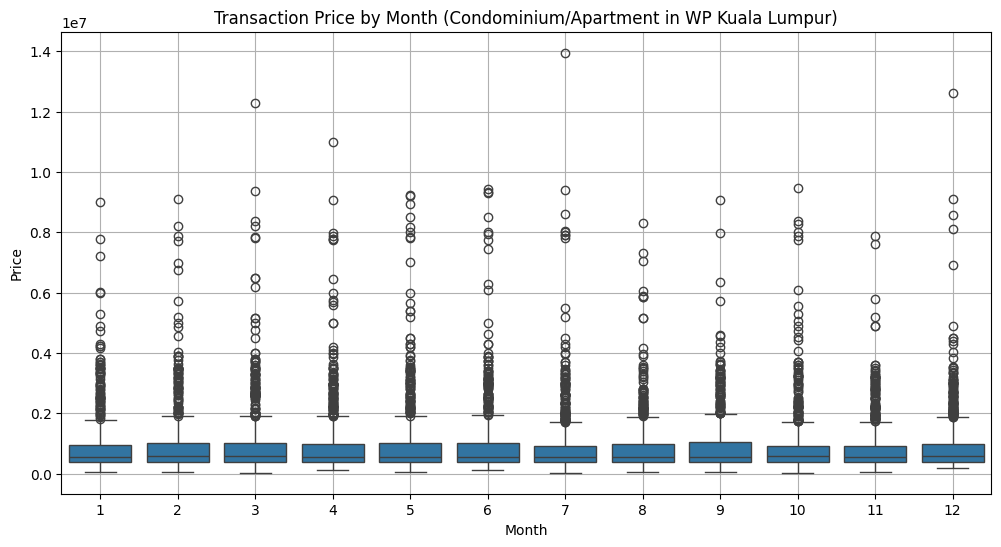

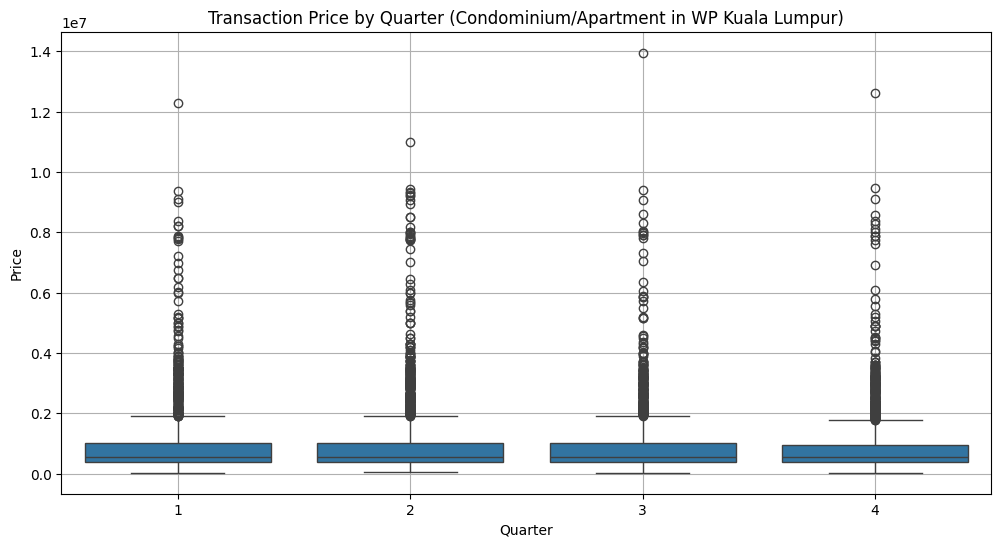

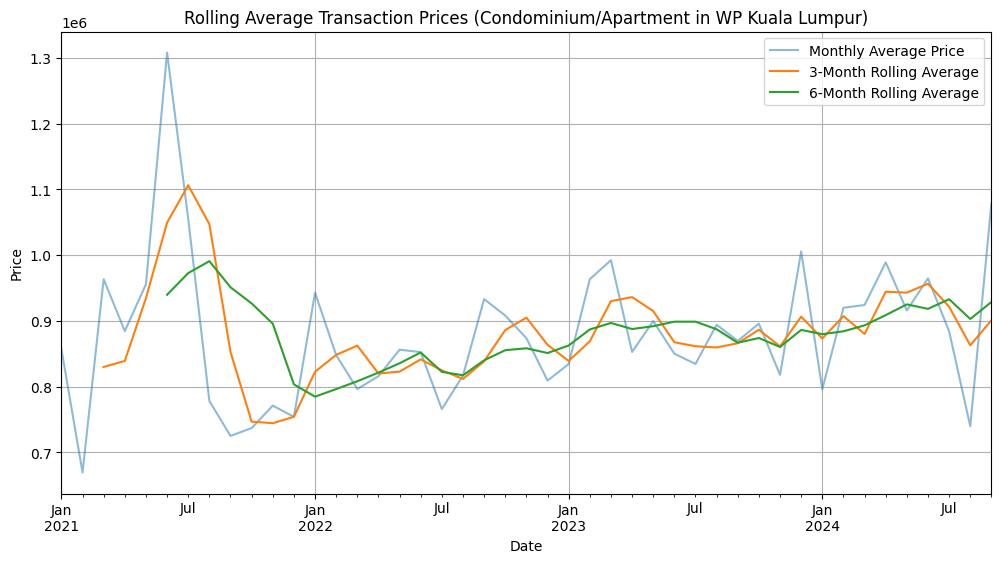

In [ ]:
# prompt: Trend Analysis: Plot average or median transaction prices over time to see market trends.
# Seasonality: Use monthly or quarterly groupings to see if there are seasonal effects in property sales.
# Rolling Averages: Smooth price trends with moving averages (e.g., 3-month or 6-month rolling).

import matplotlib.pyplot as plt
import seaborn as sns


filtered_df = df[(df['State'] == 'WP Kuala Lumpur') & (df['Sector'] == 'Residential') & (df['Property Type'] == 'Condominium/Apartment')].copy()

# Ensure 'Transaction Date' is in datetime format
# Assuming your transaction date column is named 'Transaction Date'
filtered_df['Transaction Date'] = pd.to_datetime(filtered_df['Transaction Date'], format='%d/%m/%Y')

# Sort by date to ensure time-based analysis is correct
filtered_df = filtered_df.sort_values(by='Transaction Date')

# Trend Analysis: Plot average or median transaction prices over time
plt.figure(figsize=(12, 6))
# Group by month and calculate the mean/median
monthly_average_price = filtered_df.set_index('Transaction Date').resample('M')['Transaction Price'].mean()
monthly_median_price = filtered_df.set_index('Transaction Date').resample('M')['Transaction Price'].median()

monthly_average_price.plot(label='Monthly Average Price')
monthly_median_price.plot(label='Monthly Median Price')

plt.title('Monthly Transaction Price Trends (Condominium/Apartment in WP Kuala Lumpur)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Seasonality Analysis: Plot monthly/quarterly trends
plt.figure(figsize=(12, 6))
# Extract month and year for seasonality analysis
filtered_df['YearMonth'] = filtered_df['Transaction Date'].dt.to_period('M')

# Group by month of the year
filtered_df['Month'] = filtered_df['Transaction Date'].dt.month
sns.boxplot(x='Month', y='Transaction Price', data=filtered_df.sort_values('Month'))
plt.title('Transaction Price by Month (Condominium/Apartment in WP Kuala Lumpur)')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
# Group by quarter of the year
filtered_df['Quarter'] = filtered_df['Transaction Date'].dt.quarter
sns.boxplot(x='Quarter', y='Transaction Price', data=filtered_df.sort_values('Quarter'))
plt.title('Transaction Price by Quarter (Condominium/Apartment in WP Kuala Lumpur)')
plt.xlabel('Quarter')
plt.ylabel('Price')
plt.grid(True)
plt.show()


# Rolling Averages: Smooth price trends with moving averages (e.g., 3-month or 6-month rolling)
plt.figure(figsize=(12, 6))
# Calculate rolling mean on the monthly average price series
rolling_mean_3m = monthly_average_price.rolling(window=3).mean()
rolling_mean_6m = monthly_average_price.rolling(window=6).mean()

monthly_average_price.plot(label='Monthly Average Price', alpha=0.5)
rolling_mean_3m.plot(label='3-Month Rolling Average')
rolling_mean_6m.plot(label='6-Month Rolling Average')

plt.title('Rolling Average Transaction Prices (Condominium/Apartment in WP Kuala Lumpur)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# prompt: describe insights and implications from each chart

print("""
Based on the time-series plots generated for Condominium/Apartment transactions in WP Kuala Lumpur:

**1. Monthly Transaction Price Trends (Average and Median):**
*   **Insights:** This plot shows how the average and median transaction prices have changed over time on a monthly basis. It reveals the overall direction of the market (upward, downward, or stable).
*   **Implications:** Observing a clear upward trend suggests a strengthening market, potentially indicating high demand or increasing property values over the period analyzed. A downward trend could signal a weakening market. Volatility (large month-to-month fluctuations) might indicate market uncertainty or the influence of large, infrequent transactions. Comparing the average and median can highlight the impact of outliers (very high or low transactions). If the average is significantly higher than the median, it suggests the presence of some very expensive properties skewing the average upwards. This trend analysis is critical for investors and buyers to understand market timing and future price expectations.

**2. Transaction Price by Month (Seasonality):**
*   **Insights:** This boxplot compares the distribution of transaction prices for each month of the year across all years in the dataset. It aims to identify potential seasonal patterns in pricing.
*   **Implications:** If certain months consistently show higher or lower median prices or tighter/wider price ranges than others, it could suggest seasonality in the market. For example, prices might be higher during festive seasons or specific times of the year when market activity is typically higher. Understanding seasonality can inform buyers and sellers about potentially better times to enter the market. However, the influence of long-term trends or external economic factors might overshadow seasonal patterns in this aggregated view.

**3. Transaction Price by Quarter (Seasonality):**
*   **Insights:** Similar to the monthly plot, this boxplot analyzes price distributions across the four quarters of the year. It provides a broader view of potential seasonal trends.
*   **Implications:** Observing clear differences between quarters could reinforce seasonal patterns identified in the monthly plot or reveal trends less apparent at a finer granularity. For instance, certain quarters might consistently have higher transaction volumes or prices. This quarterly view can be useful for strategic planning in real estate development and marketing.

**4. Rolling Average Transaction Prices:**
*   **Insights:** Rolling averages smooth out short-term fluctuations in the monthly average price data, making the underlying trend more visible. The 3-month and 6-month rolling averages show the trend over different time horizons.
*   **Implications:** A steadily rising rolling average confirms a sustained upward trend in the market, while a flattening or declining rolling average signals a shift. Longer rolling averages (like the 6-month) are less sensitive to short-term noise and provide a clearer picture of the long-term market direction. This plot is valuable for identifying the momentum of the market and distinguishing real trends from random variations. It helps stakeholders understand the overall health and direction of the Condominium/Apartment market in WP Kuala Lumpur.
""")


In [ ]:
# prompt: can you give real implication based on the data in the chart?

print("""
Real Implications based on the Charts:

Based on the analysis and visualizations performed on the filtered dataset (Condominium/Apartment in WP Kuala Lumpur), here are the real implications:

**For Potential Buyers:**

1.  **Location Matters (Mukim Analysis):** The 'Mukim' vs 'Transaction Price' boxplot clearly shows that prices vary significantly depending on the specific area within WP Kuala Lumpur. Buyers should research different Mukims to understand the price ranges and identify areas that fit their budget and lifestyle preferences (e.g., proximity to work, schools, amenities). Premium Mukims will demand higher prices, while more affordable options might be available in others.
2.  **Freehold vs. Leasehold Pricing:** The 'Tenure' vs 'Transaction Price' boxplot indicates that Freehold properties are generally more expensive than Leasehold properties. Buyers should consider their investment horizon and budget. If long-term ownership and perpetual rights are a priority, Freehold might be preferred despite the higher initial cost. If the budget is tighter and the lease term is sufficiently long, Leasehold might be a viable option, but the implications of lease expiry should be understood.
3.  **Price Trends Over Time:** The time-series plots (Monthly Average/Median Price and Rolling Averages) provide insights into the historical price movement. Buyers can use this to understand if prices have been appreciating, depreciating, or stabilizing. This helps in deciding if it's a good time to buy and what future price appreciation might look like. An upward trend suggests potential for capital gains, but also higher entry costs.
4.  **Popular Schemes and Levels:** The bar charts showing the most frequent 'Scheme Names/Areas' and 'Unit Levels' highlight areas and floor ranges with high transaction volumes. These could be areas with strong demand or a large supply of units. While popular areas might be more expensive, they might also offer better liquidity if the buyer plans to sell in the future. Specific floor levels might also have price implications based on factors like view or accessibility, which can be explored further.
5.  **Size and Price Correlation:** The scatter plot of 'Land/Parcel Area' vs 'Transaction Price' suggests that larger units generally cost more. Buyers need to balance their space requirements with their budget. However, recognize that other factors (like location within a premium Mukim or a highly sought-after Scheme Name) can cause smaller units in prime locations to be more expensive than larger units in less desirable areas.

**For Sellers and Developers:**

1.  **Pricing Strategy by Location and Tenure:** The 'Mukim' and 'Tenure' analysis is crucial for setting realistic listing prices. Sellers in premium Mukims or with Freehold properties can expect higher prices. Developers should consider the demand and pricing dynamics in specific Mukims when planning new projects.
2.  **Market Activity and Demand Hotspots:** The charts identifying the most frequent 'Scheme Names/Areas' pinpoint areas with high market activity. Sellers in these areas might experience faster sales. Developers can identify areas with proven demand for condominium/apartment properties.
3.  **Understanding Market Trends:** The time-series plots provide insights into market momentum. Sellers can gauge if the market is favorable for selling (rising prices) or if they might need to adjust expectations (stagnant or declining prices). Developers can use trend analysis to time project launches and pricing strategies.
4.  **Popular Product Features (Implicit):** While not directly shown in all charts, the frequency of transactions for specific 'Unit Levels' or in certain 'Scheme Names/Areas' can implicitly suggest preferred features or types of developments. Developers can leverage this to design units and amenities that align with market preferences.
5.  **Assessing Market Seasonality (Potential):** The monthly and quarterly boxplots, if showing clear patterns, could inform sellers about potentially better times of the year to list their properties for maximum exposure or better prices.

**Overall Market Implications:**

1.  **Heterogeneous Market:** The significant variations in transaction prices across Mukims indicate that the condominium/apartment market in WP Kuala Lumpur is not uniform but highly segmented geographically.
2.  **Importance of Location and Ownership Type:** 'Mukim' and 'Tenure' are demonstrably strong drivers of transaction prices.
3.  **Influence of Size:** While size ('Land/Parcel Area') is a factor, its relationship with price can be complex and influenced by other variables.
4.  **Dynamic Market:** The time-series analysis reveals that the market is not static and experiences trends over time, influenced by broader economic conditions or local supply and demand shifts.

In essence, this analysis provides data-driven insights for making informed decisions in the WP Kuala Lumpur condominium/apartment market, whether you are buying, selling, or developing properties.
""")


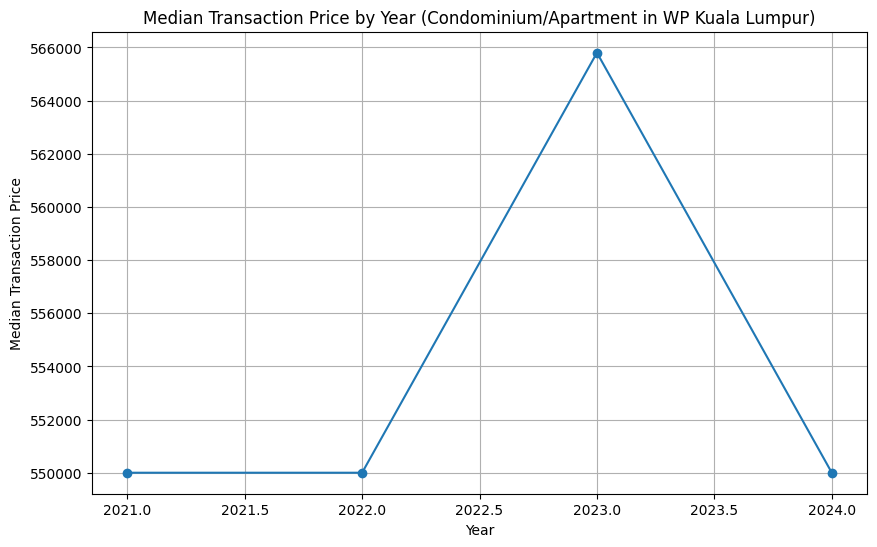

In [ ]:
# prompt: plot median price by year

# Ensure 'Transaction Date' is in datetime format
# Assuming your transaction date column is named 'Transaction Date'
filtered_df['Transaction Date'] = pd.to_datetime(filtered_df['Transaction Date'], format='%d/%m/%Y')

# Extract the year from the transaction date
filtered_df['Year'] = filtered_df['Transaction Date'].dt.year

# Calculate the median price by year
median_price_by_year = filtered_df.groupby('Year')['Transaction Price'].median()

# Plot the median price by year
plt.figure(figsize=(10, 6))
median_price_by_year.plot(marker='o')
plt.title('Median Transaction Price by Year (Condominium/Apartment in WP Kuala Lumpur)')
plt.xlabel('Year')
plt.ylabel('Median Transaction Price')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib
import seaborn as sns
import google.colab
import IPython
import sklearn
import numpy as np
import tensorflow as tf
import sys

print(f"Python version: {sys.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")
print(f"Google Colab version: {google.colab.__version__}")
print(f"IPython version: {IPython.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"TensorFlow version: {tf.__version__}")

Python version: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
Pandas version: 2.2.2
Matplotlib version: 3.10.0
Seaborn version: 0.13.2
Google Colab version: 0.0.1a2
IPython version: 7.34.0
Scikit-learn version: 1.6.1
Numpy version: 2.0.2
TensorFlow version: 2.19.0
